<img src="https://i.pinimg.com/736x/80/4b/ba/804bba60926c7466bd8c4e6bc46a72ef.jpg" alt="Me :)" width="300"/>

# Advanced Analytics for Marketing Strategies
## Leveraging customer trends for improved Engagement

#### Lara Cadel

#

<a id="Table_of_contents"></a>
# Table of Contents

### 1. Data ingestion and Initial Inspection

1.1 **[Introduction](#Introduction)**
      
1.2 **[Setting up the Notebook workflow](#Setting-up-the-Notebook-workflow)** 

1.3 **[Data Cleaning](#Data-Cleaning)**

1.4 **[Exploratory Data Analysis (EDA)](#Exploratory_Data_Analysis_(EDA))** 

### 2. Simple and Multiple Linear Regression

2.1 **[Approach](#Approach)**
      
2.2 **[Simple Linear Rregression](#Simple_Linear_Rregression)** 

2.3 **[Multiple Linear Rregression](#Multiple_Linear_Rregression)** 


### 3. Decision Tree and Random Forest

3.1 **[Load and Prepare the Data](#Load_and_Prepare_the_Data)**
      
3.2 **[Decision Tree Model](#Decision_Tree_Model)** 

3.3 **[Random Forest](#Random_Forest)** 


### 4. [*k*-means Clustering](#k-means_Clustering)

### 5. [NLP and Naive Bayes Classifier](#NLP_and_Naive_Bayes_Classifier)

#

# 1. Data ingestion and Initial Inspection

<a id="Introduction"></a>
## 1.1 Introduction

Starting with linear and multiple linear regression helps to understand basic relationships between variables like age, spending and remuneration, and loyalty points. Decision trees explore non-linear interactions and decision-making structures, while random forests increase model complexity while reducing overfitting and improving accuracy. K-means clustering uncovers natural customer segments based on engagement and purchasing power, providing actionable insights. This layered approach, from prediction to segmentation, allows for incremental learning and adaptation, helping Turtle Games tailor their marketing efforts effectively.

##

<a id="Setting-up-the-Notebook-workflow"></a>
## 1.2 Setting up the Notebook workflow

In [19]:
# Imports the relevant libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import re
import statsmodels.formula.api as smf
import math
import matplotlib.cm as cm
import nltk 
import os

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import norm

from sklearn.utils.validation import column_or_1d
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter


# Settings for the notebook.
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15, 10]


###

<a id="Data-Cleaning"></a>
# 1.3 Data Cleaning

In [91]:
# Load the CSV file as 'reviews' DataFrame.
reviews = pd.read_csv('turtle_reviews.csv')

# Remove redundant columns (language and platform).
reviews = reviews.drop(['language', 'platform'], axis=1)

# Change column headings to names that are easier to reference (e.g. renumeration and spending_score)
reviews = reviews.rename(columns={'remuneration (k£)' : 'remuneration',
                                  'spending_score (1-100)' : 'spending_score'})

# # Normalise the text entries in the 'education' column.
reviews['education'] = reviews['education'].replace('Basic', 'diploma')

In [93]:
# Function the explore the DataFrame
def process_dataframe(df, categorical_columns=None, show_description=True):
    """
    Function to inspect and process a pandas DataFrame.
    
    Steps:
    1. View the DataFrame (first 5 rows).
    2. Check for missing values.
    3. Show the shape of the DataFrame.
    4. Display metadata information.
    5. Convert specified columns to category type.
    6. Show descriptive statistics for numerical columns.
    
    """
    # View the first 5 rows of the DataFrame
    print('\033[1mFirst 5 rows of the DataFrame:\033[0m')
    print(df.head())

    # Investigate the shape of the DataFrame
    print('\n\033[1mShape of the DataFrame:\033[0m', df.shape)
    
    # Check for missing values in each column
    print('\n\033[1mMissing values for each column:\033[0m')
    print(df.isna().sum())
    
    # Show metadata of the DataFrame
    print('\n\033[1mDataFrame info before type conversion:\033[0m')
    df.info()

    # Show the column names
    print('\n\033[1mColumn Names:\033[0m')
    print(df.columns.tolist())
    
    # Convert specified columns to 'category' type
    if categorical_columns:
        for col in categorical_columns:
            if col in df.columns:
                df[col] = df[col].astype('category')
    
    # Show metadata after type conversion
    print('\n\033[1mDataFrame info after type conversion:\033[0m')
    print(df.info())
    
    # Show descriptive statistics for numerical columns
    if show_description:
        print('\n\033[1mDescriptive statistics of the numerical data:\033[0m')
        print(df.describe().round(2))

    return df


In [95]:
# Pass the DataFrame to the process_dataframe function
processed_reviews = process_dataframe(reviews, categorical_columns=['gender', 'education', 'product'])

First 5 rows of the DataFrame:
   gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Du

### Save the DataFrame as a CSV file

In [98]:
# Create a CSV file as output.
reviews.to_csv('clean_reviews.csv', index=False)

###

<a id="Exploratory_Data_Analysis_(EDA)"></a>
## 1.4 Exploratory Data Analysis (EDA)

#### Data Distribution Visualisation

In [103]:
# Function to plot numerical values distribution and categorical variables counts.
def vis_df(df, file_name):
    try:
        # Plot histograms for numerical columns
        numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        if numerical_cols:
            print("\nPlotting histograms for numerical columns...")
            df[numerical_cols].hist(figsize=(10, 10))
            plt.suptitle(f'Histograms for {file_name} - Numerical Columns')
            plt.tight_layout()
            plt.show()

        # Plot count plots for non-numerical (categorical) columns
        categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
        if categorical_cols:
            print("\nPlotting count plots for categorical columns...")
            for col in categorical_cols:
                # Get top 10 and bottom 10 unique values
                value_counts = df[col].value_counts()
                if len(value_counts) > 20:
                    top_10 = value_counts.nlargest(10)
                    bottom_10 = value_counts.nsmallest(10).sort_values(ascending=False)
                    value_counts = pd.concat([top_10, bottom_10])

                plt.figure(figsize=(10, 6))
                sns.countplot(y=col, data=df, order=value_counts.index)
                plt.title(f'Count Plot of {col} in {file_name}')
                plt.xlabel('Count')
                plt.ylabel(col)
                plt.tight_layout()
                plt.show()

        return df
    
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


Plotting histograms for numerical columns...


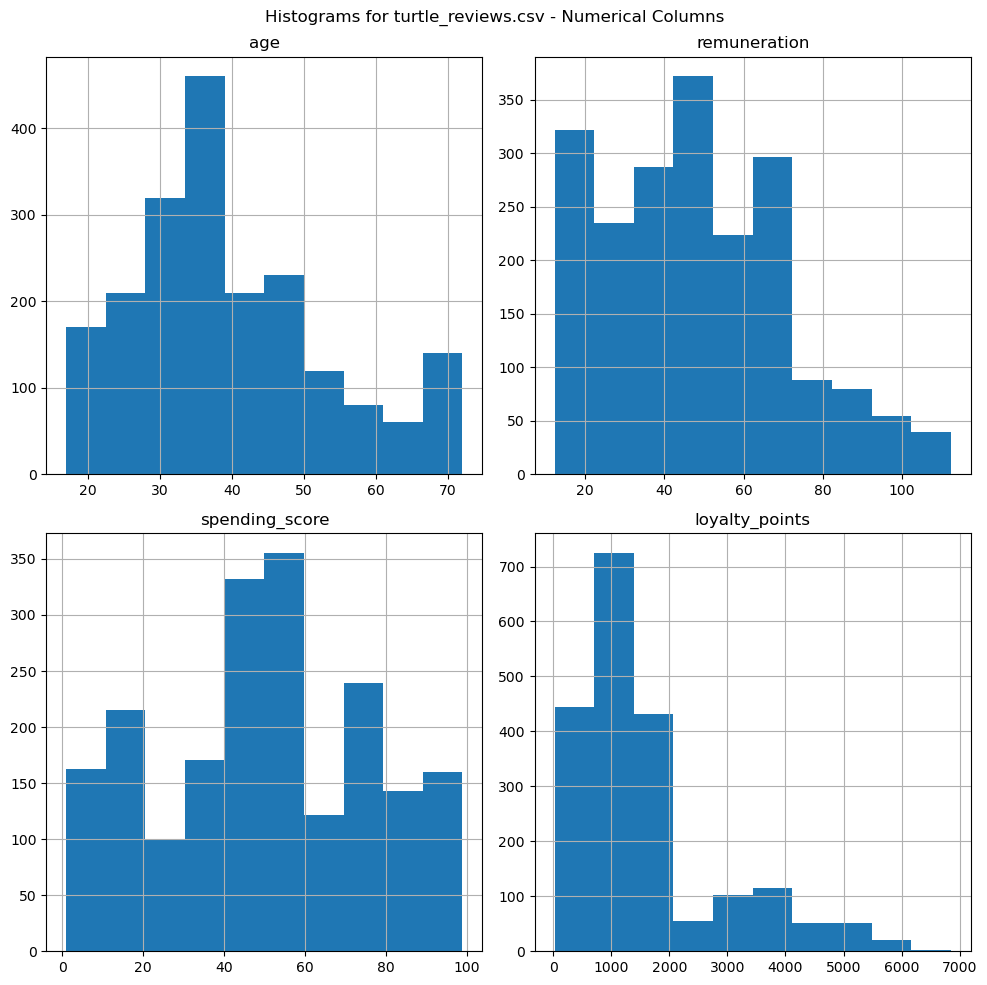


Plotting count plots for categorical columns...


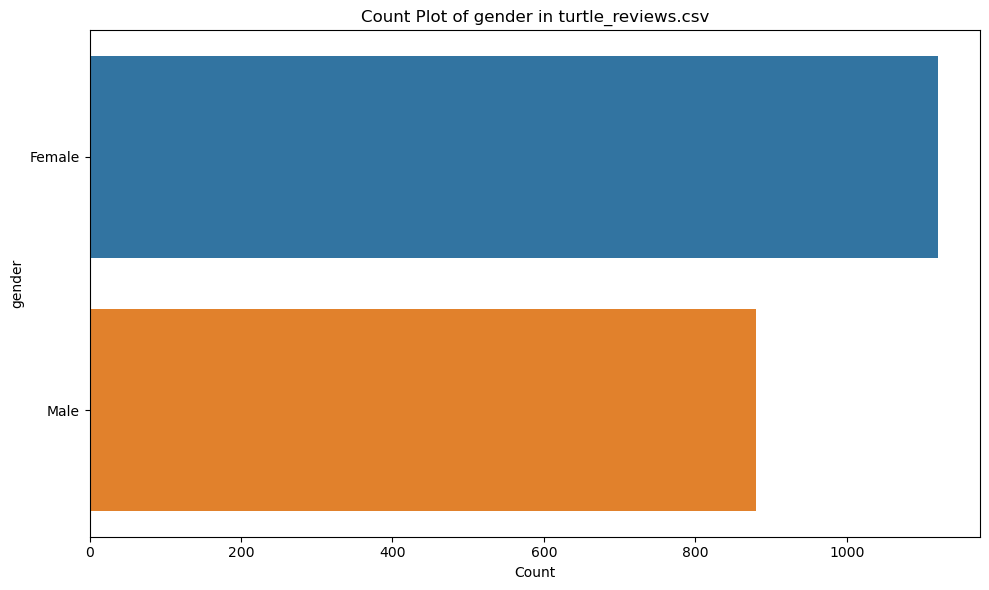

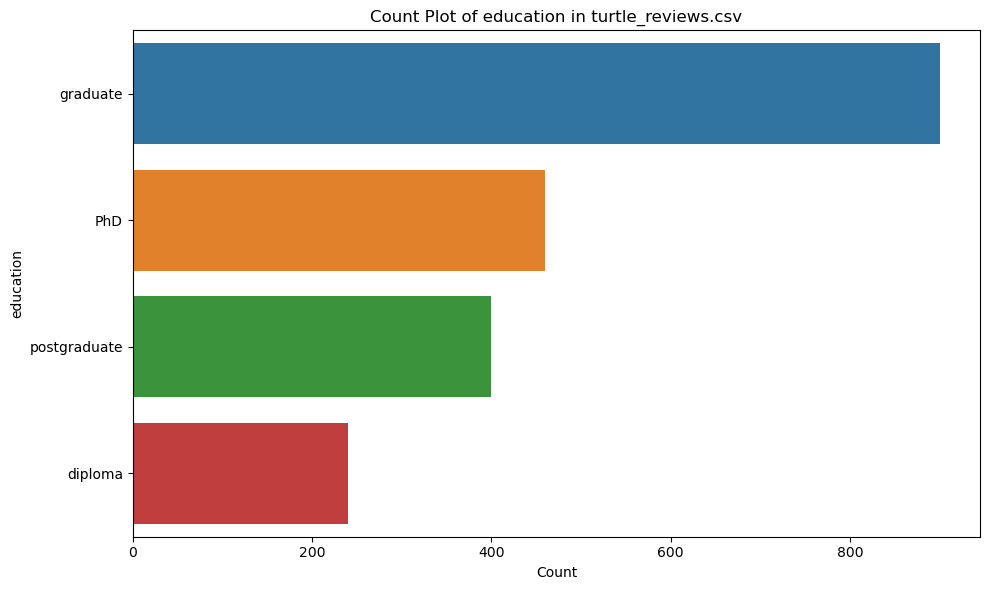

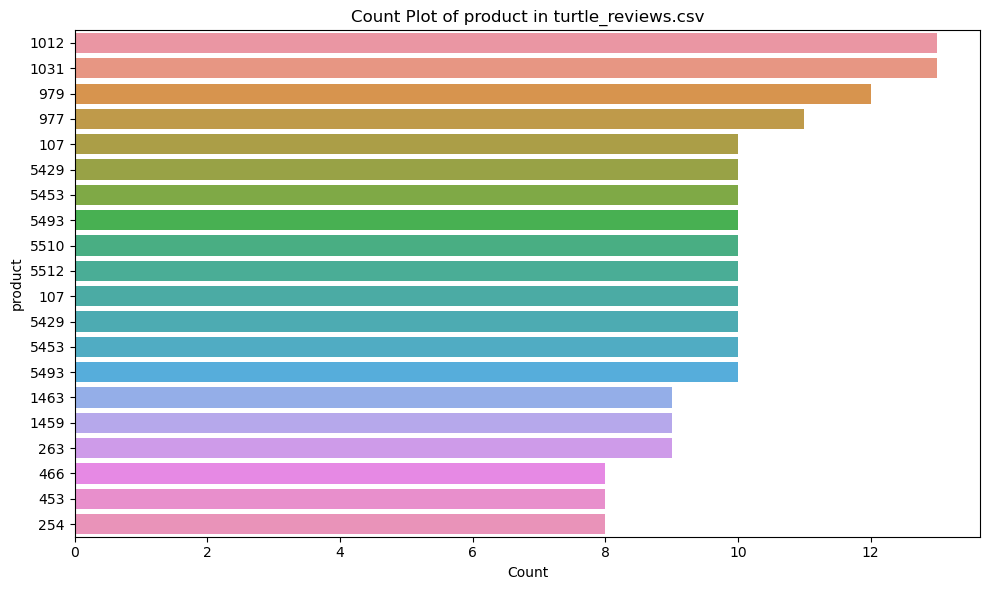

In [105]:
# Temporary remove columns that will be analysed later.
reviews = reviews.drop(['review', 'summary'], axis=1)

# Apply the function
vis = vis_df(reviews,'turtle_reviews.csv')

**[Table of Contents](#Table_of_contents)**

#

<a id="Simple_and_Multiple_Linear_Regression"></a>
# 2. Simple and Multiple Linear Regression

<a id="Approach"></a>
## 2.1 Approach

### Linear regression.

Use simple and multiple linear regression to assess the linear relationships between loyalty points (dependent variable) and the indipendent variables: age, remuneration, and spending scores. The goal is to determine if these numerical variables, alone or together, can effectively predict a customer's loyalty points.

**Model Type**: OLS Regression (Simple Linear Regression)
The model aims to predict the dependent variable (`y`) based on a single predictor variable (`x`).

**Check for correlation**

In [114]:
# Select only numerical columns
reviews_nvar = reviews.select_dtypes(include=['number'])

# Determine correlation between numerical variables.
correlation_matrix = reviews_nvar.corr()

# Display the correlation matrix
correlation_matrix

age  remuneration  spending_score  loyalty_points
age             1.000000     -0.005708       -0.224334       -0.042445
remuneration   -0.005708      1.000000        0.005612        0.616065
spending_score -0.224334      0.005612        1.000000        0.672310
loyalty_points -0.042445      0.616065        0.672310        1.000000

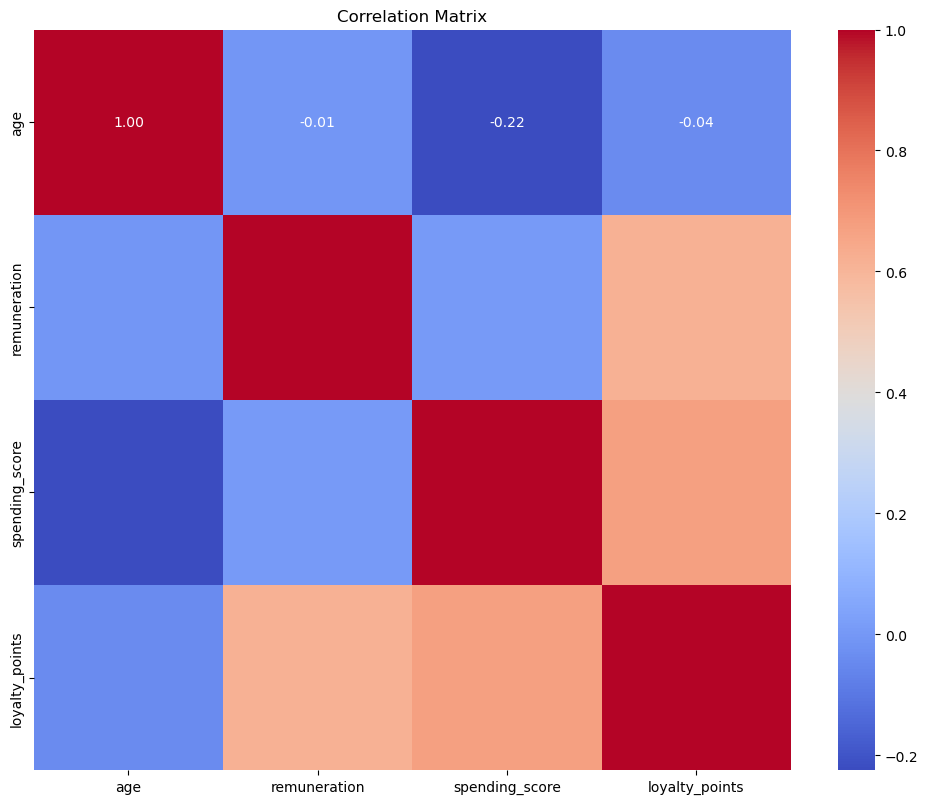

In [116]:
# Plot heatmap of correlation.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.tight_layout()
plt.title('Correlation Matrix')
plt.show()

#### Notes:
- Weak or negligible correlations are observed between age and other variables, indicating that age might not be a significant factor in determining remuneration, spending score, or loyalty points in this dataset.
  
- Moderate to strong positive correlations are seen between remuneration, spending score, and loyalty points, suggesting that these variables are more closely related. Higher remuneration is associated with more loyalty points, and higher spending scores are strongly associated with higher loyalty points.

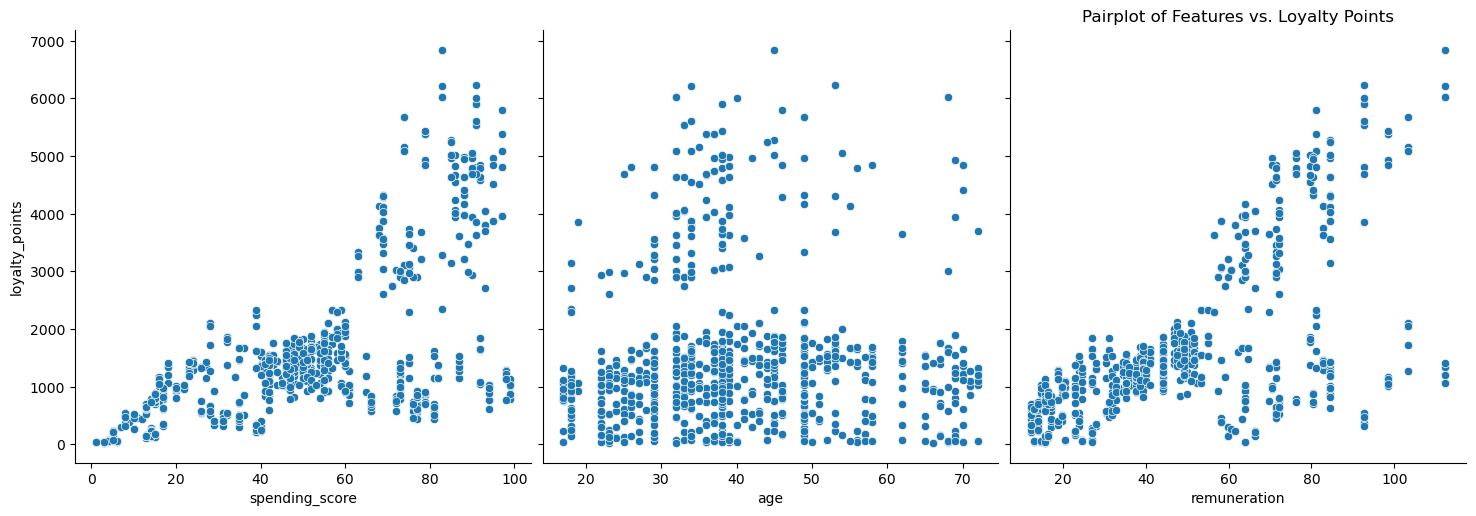

In [119]:
# Visualisation for easier comparision.
sns.pairplot(reviews, x_vars=['spending_score', 'age', 'remuneration'], y_vars='loyalty_points', height=5, aspect=1)
plt.title('Pairplot of Features vs. Loyalty Points')
plt.show()

###

<a id="Simple_Linear_Rregression"></a>
## 2.2 Simple Linear Rregression

In [123]:
# Function for performing linear regression analysis.
def perform_linear_regression(x, y, x_label, y_label, plot_title, scatter_color, line_color, spending_score):
    """
    Perform linear regression on given x and y values, output metrics, plot results,
    create a Q-Q plot, and perform the Shapiro-Wilk test.
    """
    # Ensure x and y are in the correct format (2D for x)
    x = np.array(x).reshape(-1, 1)
    y = np.array(y)

    # Initialise the Linear Regression model
    lm = LinearRegression()

    # Fit the model
    lm.fit(x, y)

    # Calculate R-squared, intercept, and coefficient
    r_squared = lm.score(x, y)
    intercept = lm.intercept_
    coefficient = lm.coef_

    print(f"R-squared value: {r_squared}")
    print(f"Intercept value: {intercept}")
    print(f"Coefficient value: {coefficient}")

    # Use statsmodels for OLS regression and summary
    data = pd.DataFrame({'x': x.flatten(), 'y': y})
    ols_model = smf.ols(formula='y ~ x', data=data).fit()
    print(ols_model.summary())

    # Predict values
    y_pred = lm.predict(x)

    # Plot the actual vs predicted with the regression line
    plt.scatter(x, y, color=scatter_color, label='Actual data')
    plt.plot(x, y_pred, color=line_color, label='Regression line')
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

    # Q-Q plot for normality check of the residuals (spending_score)
    sm.qqplot(spending_score, fit=True, line='45')
    plt.ylabel("Spending Quartiles")
    plt.xlabel("Normal Quartiles")
    plt.title("Q-Q plot")
    plt.show()

    # Shapiro-Wilk test for normality
    stat, p_value = shapiro(spending_score)
    print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}")

    # Return model metrics as a dictionary
    return {'r_squared': r_squared, 'intercept': intercept, 'coefficient': coefficient, 'shapiro_stat': stat, 'shapiro_p': p_value}


In [125]:
# Log transformation for skewed variables.
reviews['log_loyalty_points'] = np.log(reviews['loyalty_points'] + 1) 
reviews['log_remuneration'] = np.log(reviews['remuneration'] + 1)      
reviews['log_spending_score'] = np.log(reviews['spending_score'] + 1)

### a) spending vs loyalty

R-squared value: 0.4520008865838909
Intercept value: -75.05266293364707
Coefficient value: [33.06169326]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          2.92e-263
Time:                        12:48:43   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

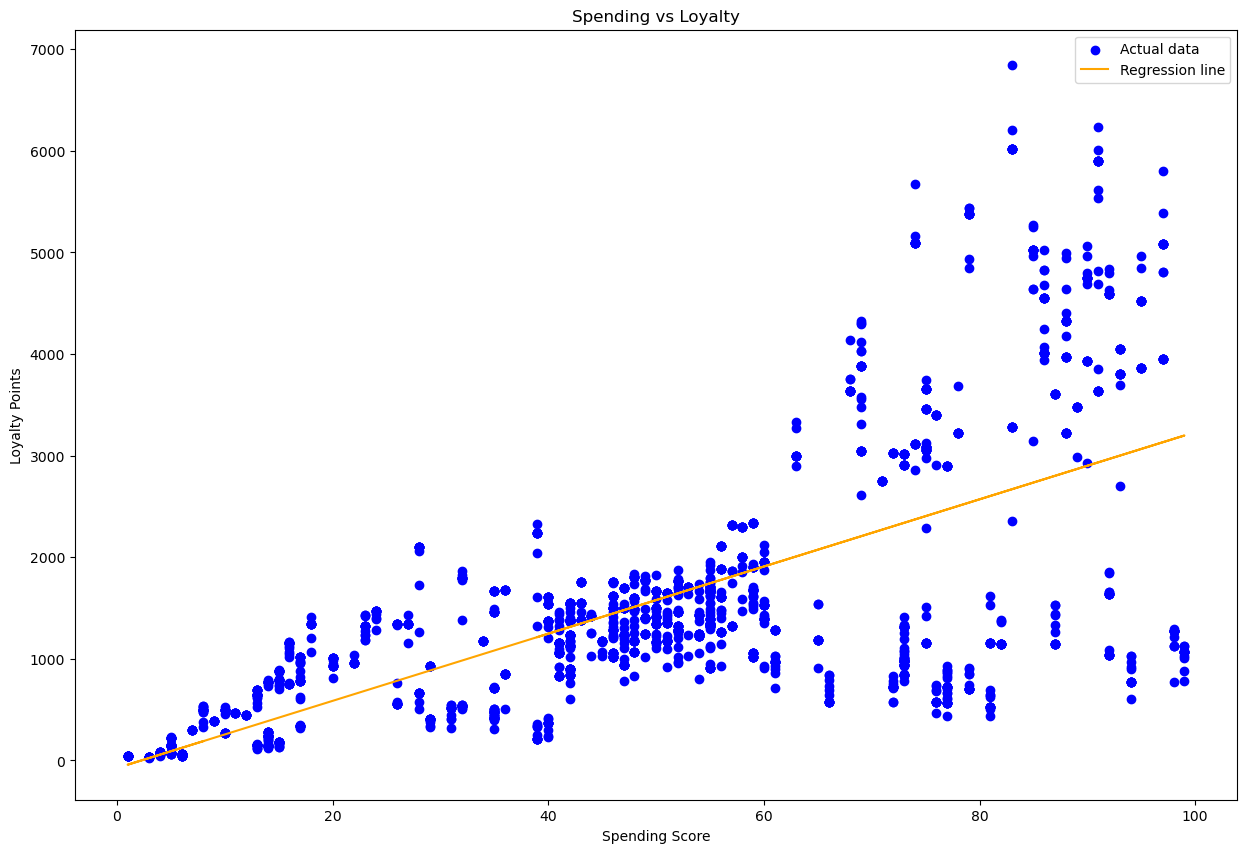

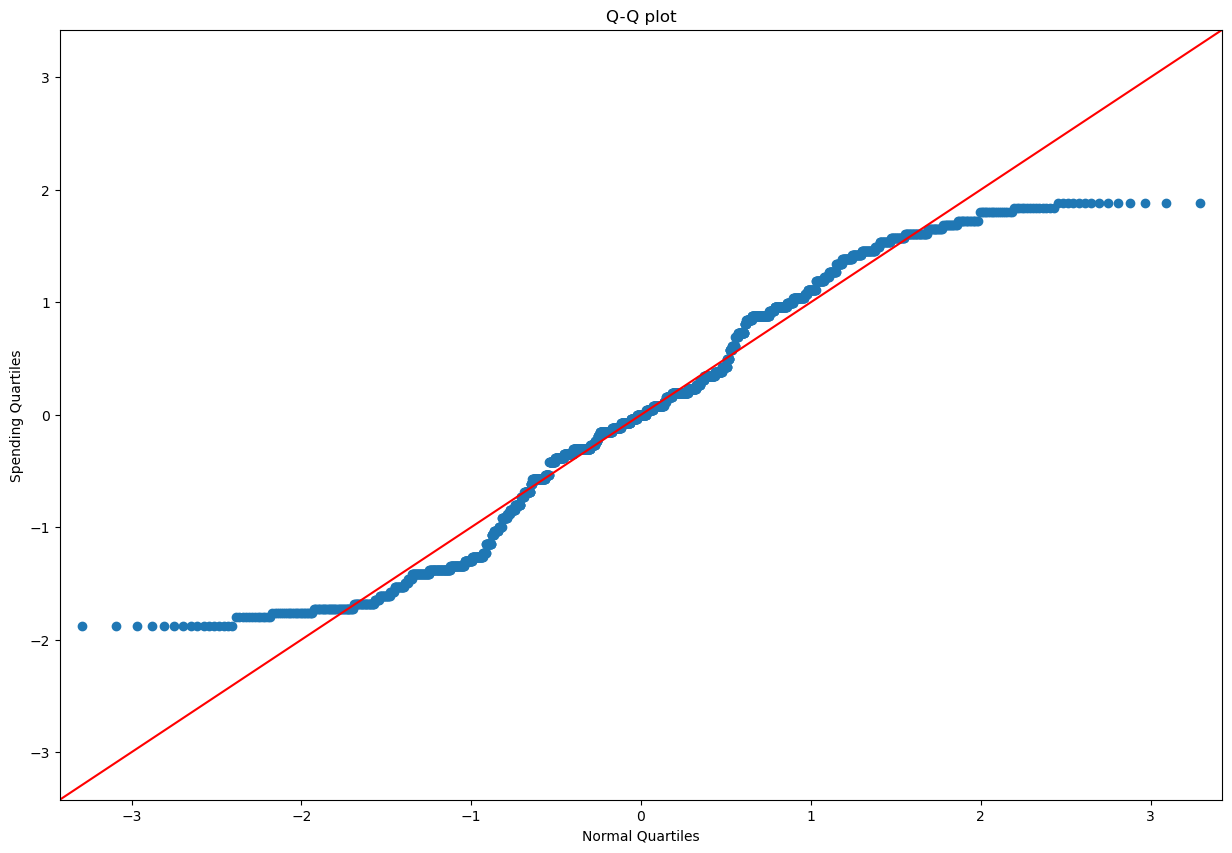

Shapiro-Wilk Test Statistic: 0.9683461785316467, p-value: 1.454314864102208e-20


{'r_squared': 0.4520008865838909,
 'intercept': -75.05266293364707,
 'coefficient': array([33.06169326]),
 'shapiro_stat': 0.9683461785316467,
 'shapiro_p': 1.454314864102208e-20}

In [128]:
# Apply the function for x = 'spending_score'
perform_linear_regression(x=reviews['spending_score'], y=reviews['loyalty_points'], 
    x_label='Spending Score', y_label='Loyalty Points', 
    plot_title='Spending vs Loyalty', scatter_color='blue', line_color='orange', 
    spending_score=reviews['spending_score'])

R-squared value: 0.6654969601897462
Intercept value: 3.0042640556175475
Coefficient value: [1.07037223]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     3975.
Date:                Thu, 05 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:48:44   Log-Likelihood:                -1776.1
No. Observations:                2000   AIC:                             3556.
Df Residuals:                    1998   BIC:                             3567.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

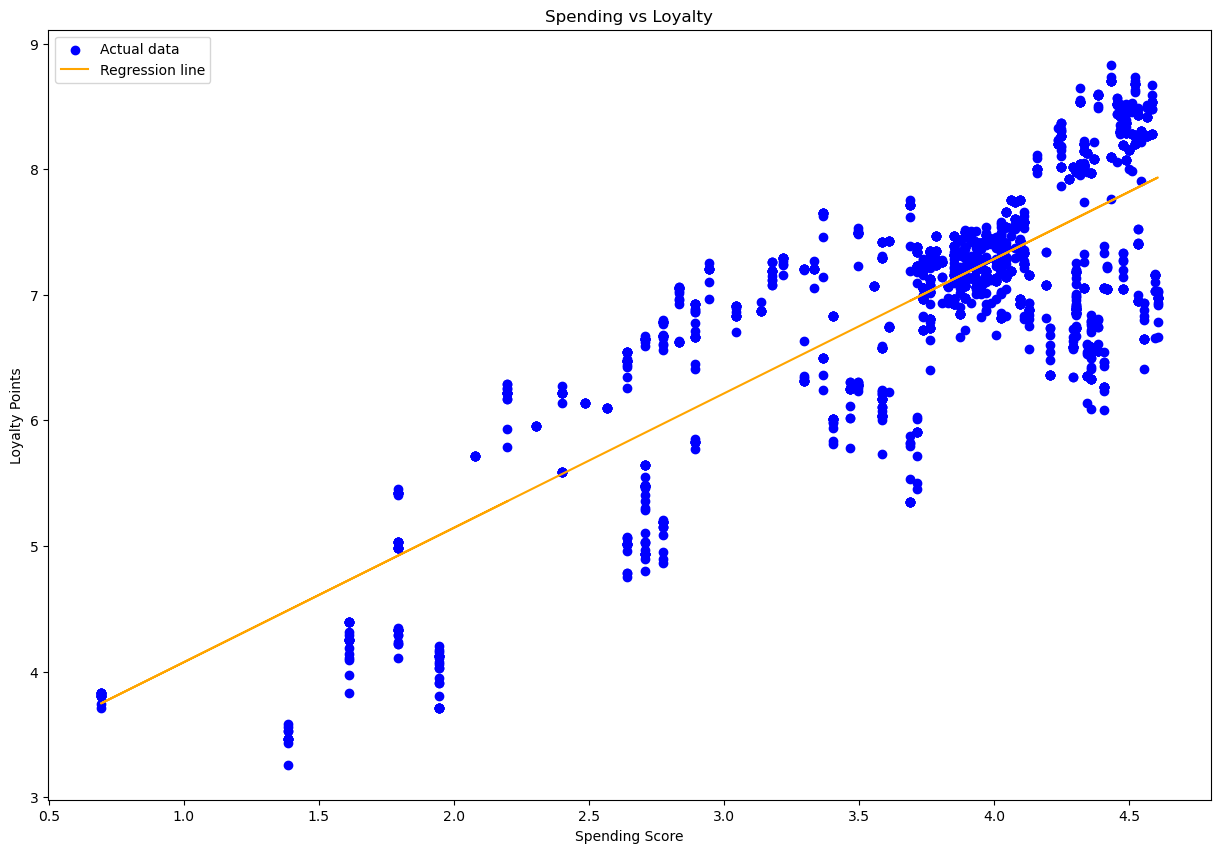

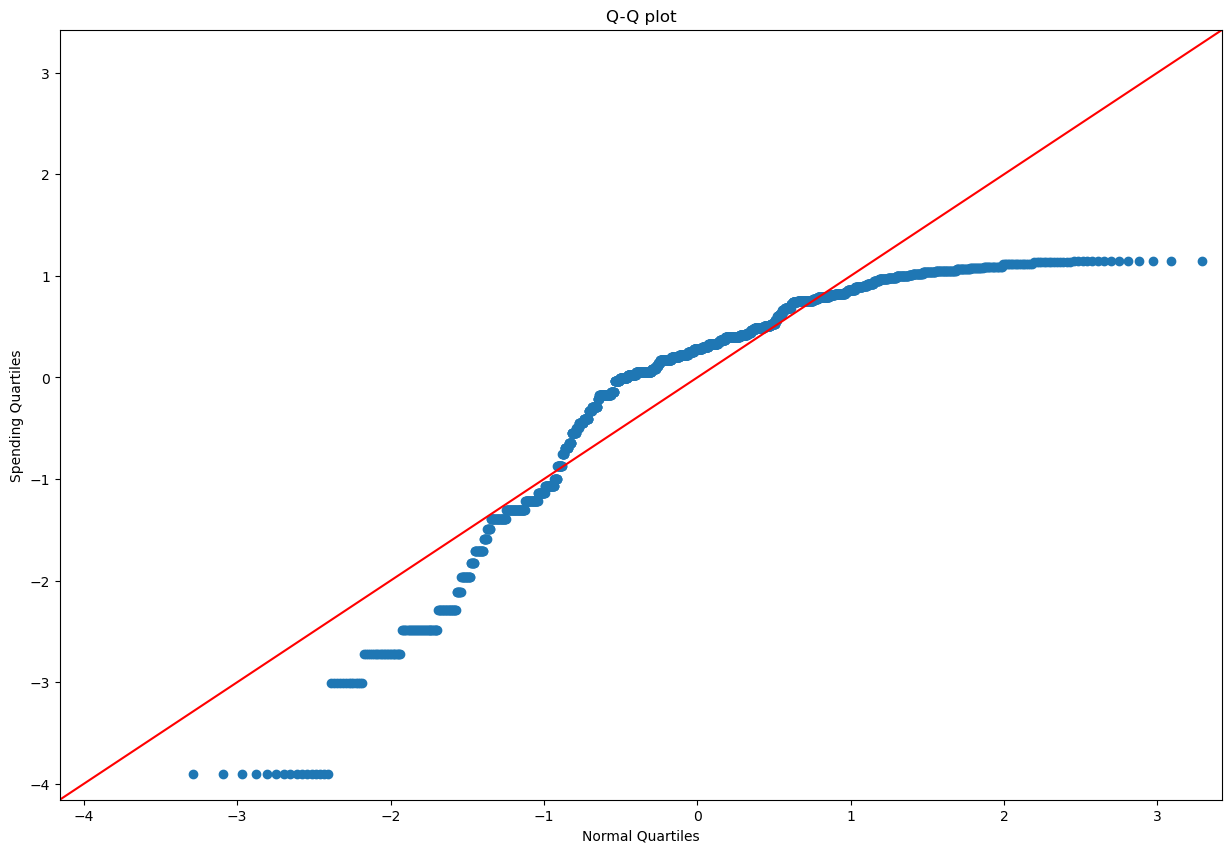

Shapiro-Wilk Test Statistic: 0.8510646820068359, p-value: 7.289428494555909e-40


{'r_squared': 0.6654969601897462,
 'intercept': 3.0042640556175475,
 'coefficient': array([1.07037223]),
 'shapiro_stat': 0.8510646820068359,
 'shapiro_p': 7.289428494555909e-40}

In [129]:
# Apply the function for x = 'log_spending_score'
perform_linear_regression(x=reviews['log_spending_score'], y=reviews['log_loyalty_points'], 
    x_label='Spending Score', y_label='Loyalty Points', 
    plot_title='Spending vs Loyalty', scatter_color='blue', line_color='orange', 
    spending_score=reviews['log_spending_score'])

#### Notes: 
(I decided to keep the logarithmic model due to significantly higher R-squared, despite the slight deterioration in normality).

#### Summary of Findings:

- **Model Fit (R-squared)**: The model explains **66.5%** of the variance in the dependent variable, indicating a strong fit.
- **Coefficient**: The coefficient for the independent variable is 1.0704, suggesting that for each unit increase in the independent variable, the dependent variable increases by approximately 1.07.
- **Statistical Significance**: The p-value for the coefficient is **0.000**, meaning the independent variable is statistically significant.
- **Residual Normality (Shapiro-Wilk Test)**: The Shapiro-Wilk test produced a **statistic of 0.851** and a p-value of **7.29e-40**, indicating that the residuals are **not normally distributed**.

### b) renumeration vs loyalty

R-squared value: 0.3795357732793634
Intercept value: -65.68651279500432
Coefficient value: [34.18782549]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          2.43e-209
Time:                        12:48:45   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

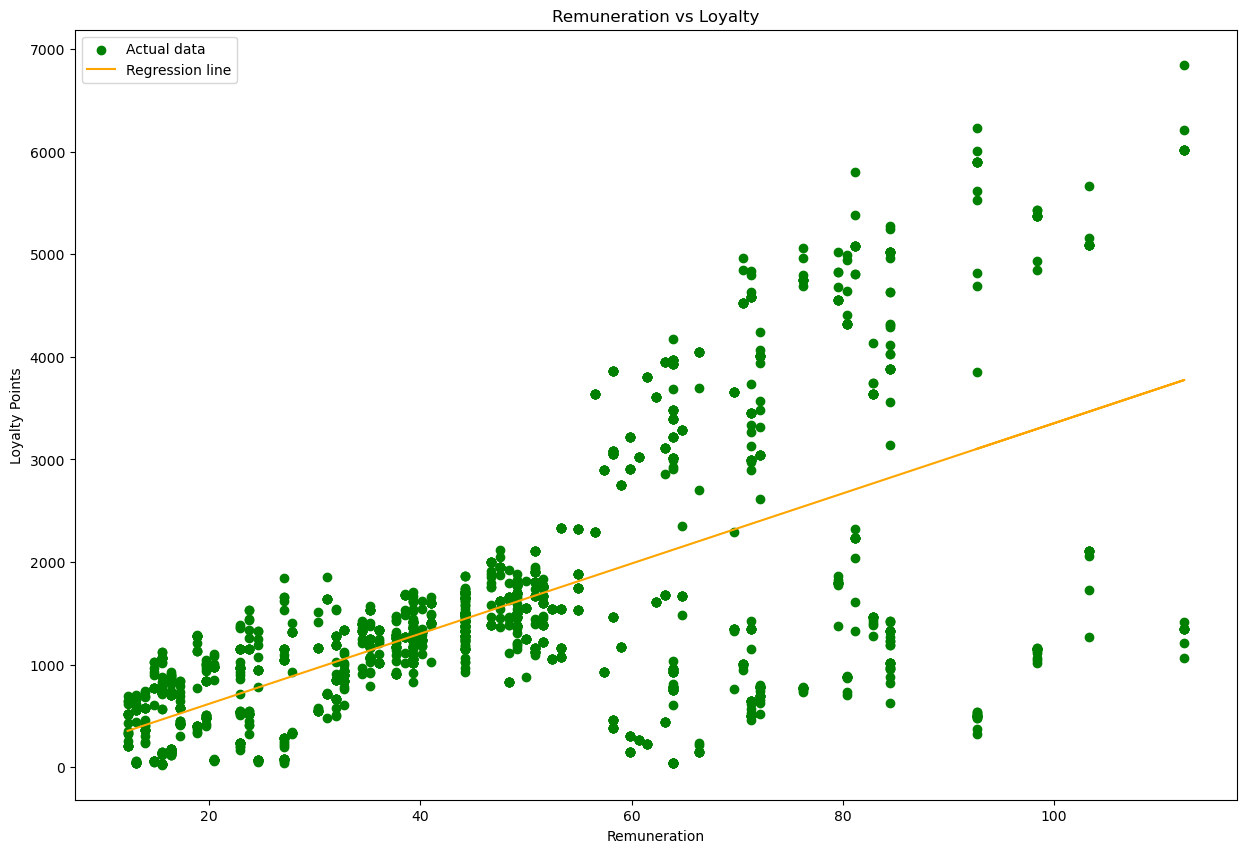

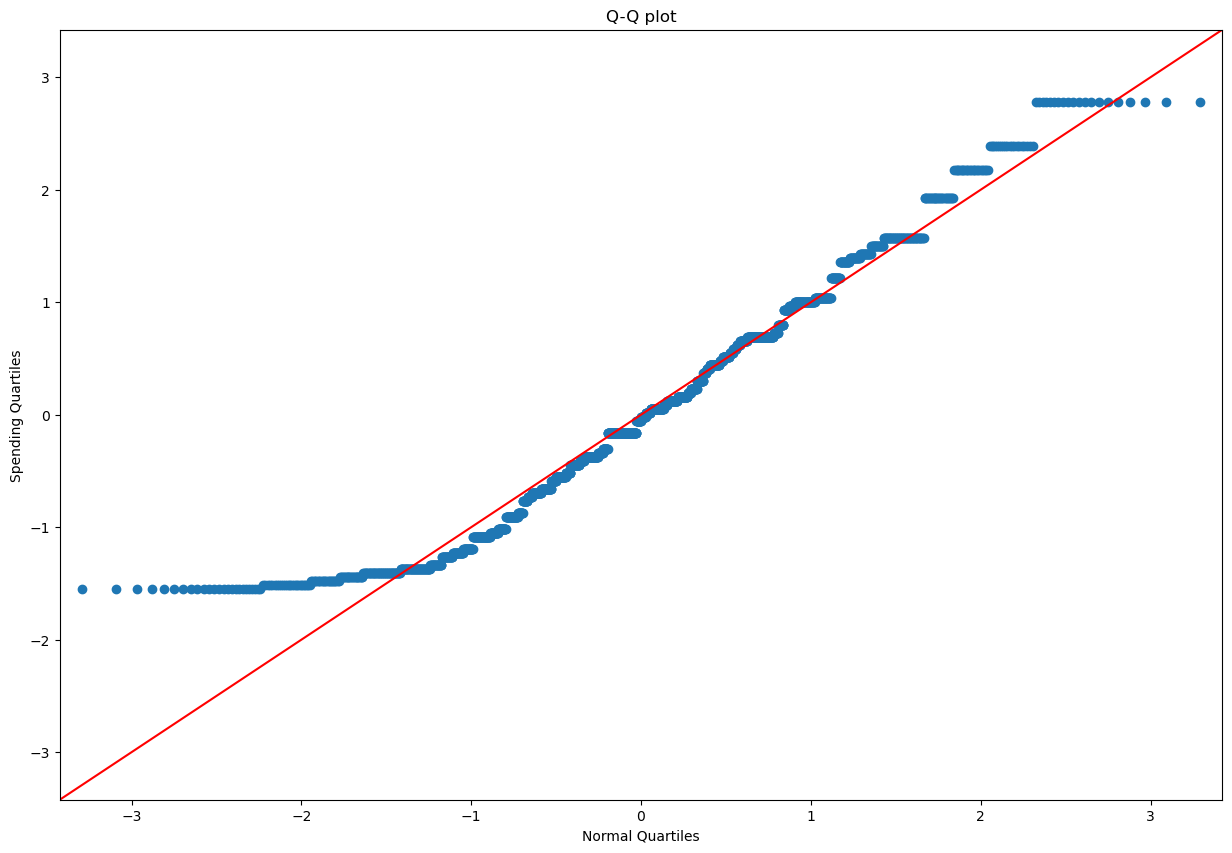

Shapiro-Wilk Test Statistic: 0.9676777124404907, p-value: 8.844986552273406e-21


{'r_squared': 0.3795357732793634,
 'intercept': -65.68651279500432,
 'coefficient': array([34.18782549]),
 'shapiro_stat': 0.9676777124404907,
 'shapiro_p': 8.844986552273406e-21}

In [134]:
# Apply the function for x = 'remuneration'
perform_linear_regression(x=reviews['remuneration'], y=reviews['loyalty_points'], 
    x_label='Remuneration', y_label='Loyalty Points', 
    plot_title='Remuneration vs Loyalty', scatter_color='green', line_color='orange', 
    spending_score=reviews['remuneration'])

R-squared value: 0.340423080280261
Intercept value: 2.799914300176151
Coefficient value: [1.1112985]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     1031.
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          8.54e-183
Time:                        12:48:46   Log-Likelihood:                -2455.0
No. Observations:                2000   AIC:                             4914.
Df Residuals:                    1998   BIC:                             4925.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

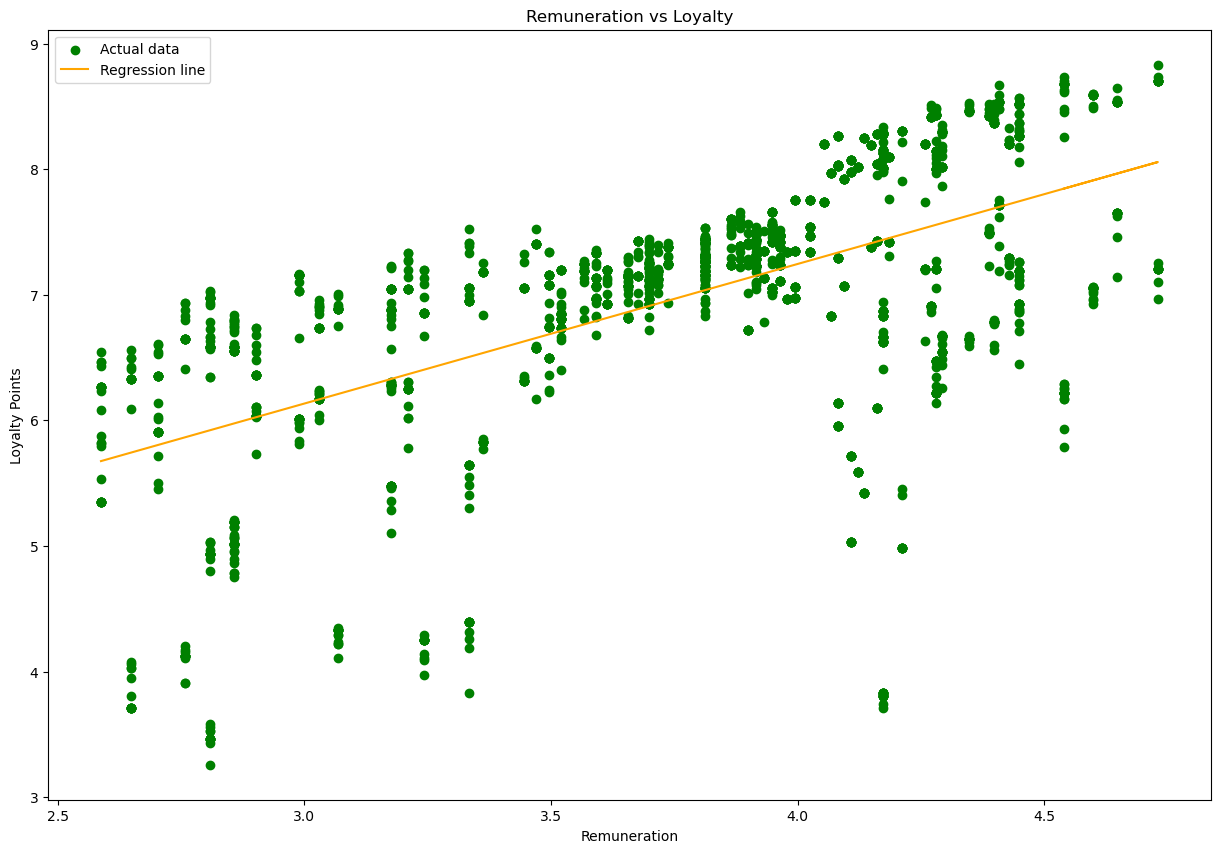

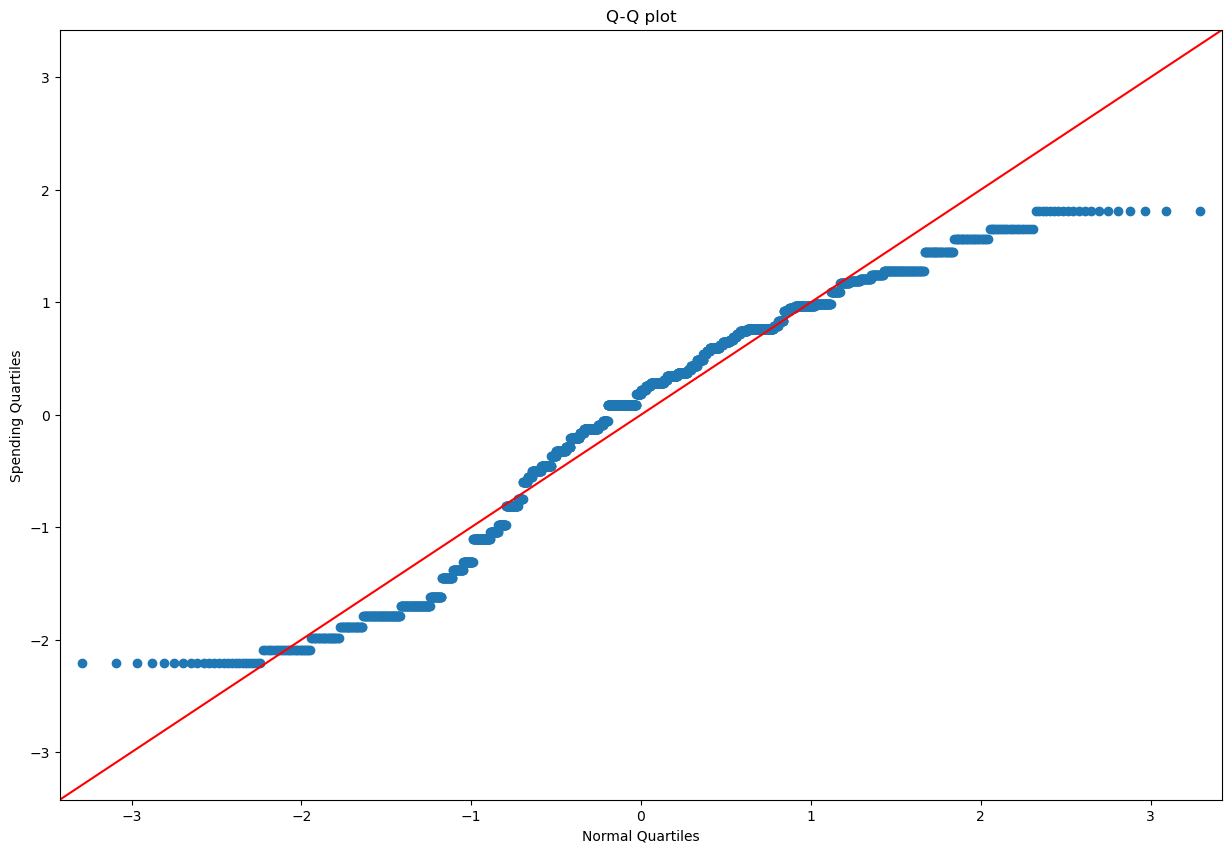

Shapiro-Wilk Test Statistic: 0.9522387385368347, p-value: 4.877143393366352e-25


{'r_squared': 0.340423080280261,
 'intercept': 2.799914300176151,
 'coefficient': array([1.1112985]),
 'shapiro_stat': 0.9522387385368347,
 'shapiro_p': 4.877143393366352e-25}

In [135]:
# Apply the function for x = 'log_remuneration'
perform_linear_regression(x=reviews['log_remuneration'], y=reviews['log_loyalty_points'], 
    x_label='Remuneration', y_label='Loyalty Points', 
    plot_title='Remuneration vs Loyalty', scatter_color='green', line_color='orange', 
    spending_score=reviews['log_remuneration'])

#### Notes:
(I decided to keep the normal values model due to better R-squared and residual normality).

#### Summary of Findings:
- **Weaker Fit (R-squared = 0.380)**: This model explains less of the variation in `y` compared to the previous model.
- **Significant Relationship**: Despite the lower R-squared, `x` remains a significant predictor of `y` with a strong positive relationship.
- **Residual Normality (Shapiro-Wilk Test)**: The Shapiro-Wilk test produced a **statistic of 0.968** and a p-value of **8.84e-21**, indicating that the residuals are **not normally distributed**.


### c) age vs loyalty

R-squared value: 0.0018015480437203468
Intercept value: 1736.517739399063
Coefficient value: [-4.01280515]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Thu, 05 Dec 2024   Prob (F-statistic):             0.0577
Time:                        12:48:48   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------

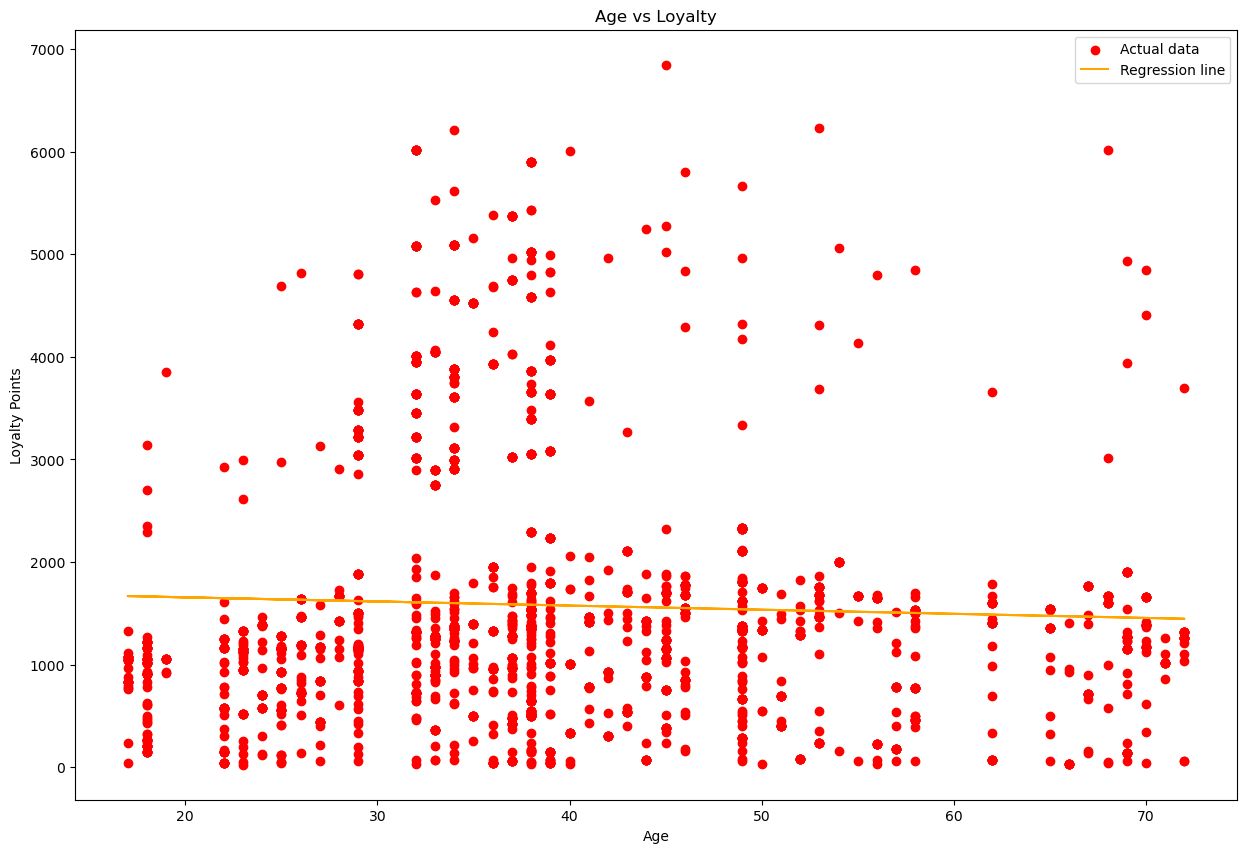

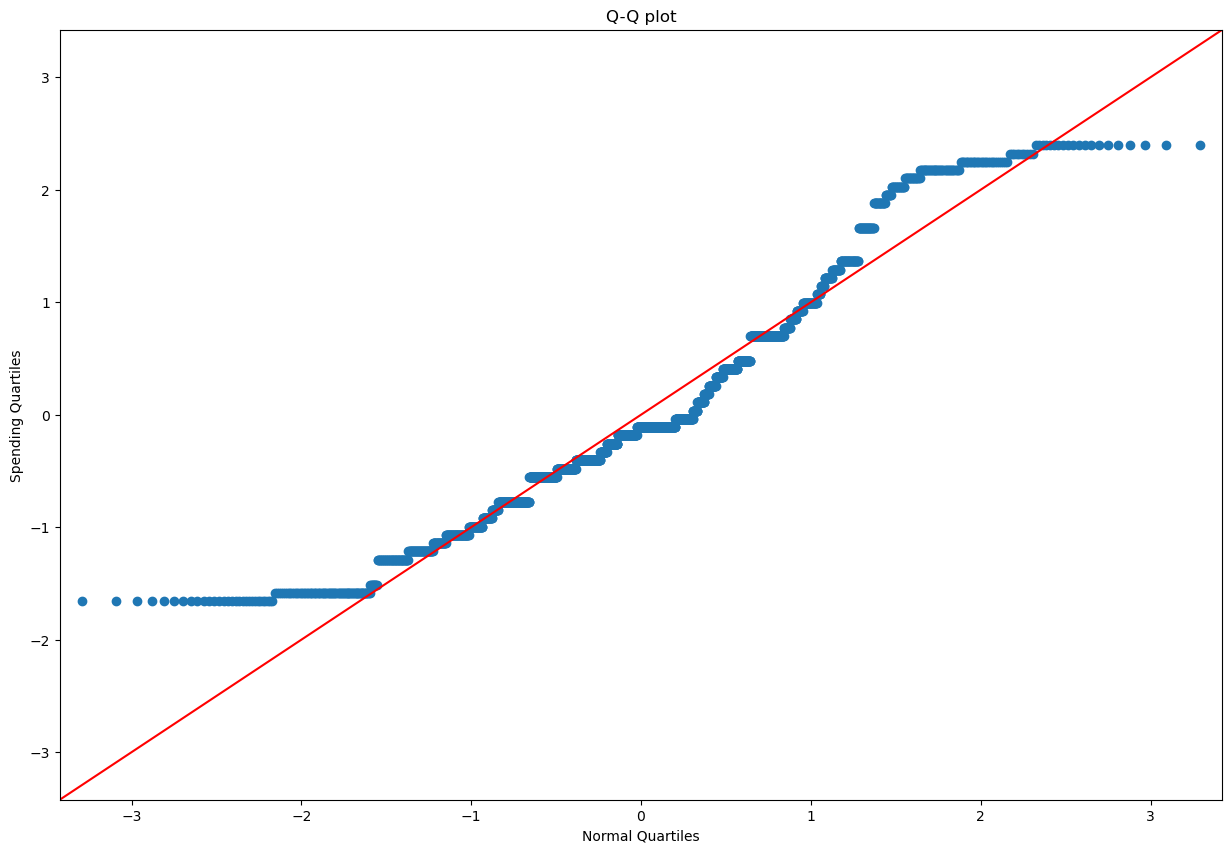

Shapiro-Wilk Test Statistic: 0.9524177312850952, p-value: 5.384232057927602e-25


{'r_squared': 0.0018015480437203468,
 'intercept': 1736.517739399063,
 'coefficient': array([-4.01280515]),
 'shapiro_stat': 0.9524177312850952,
 'shapiro_p': 5.384232057927602e-25}

In [139]:
# Apply the function for x = 'age'
perform_linear_regression(x=reviews['age'], y=reviews['loyalty_points'], 
    x_label='Age', y_label='Loyalty Points', 
    plot_title='Age vs Loyalty', scatter_color='red', line_color='orange', 
    spending_score=reviews['age'])

R-squared value: 0.001187527368261443
Intercept value: 7.08613233682909
Coefficient value: [-0.00258215]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.376
Date:                Thu, 05 Dec 2024   Prob (F-statistic):              0.123
Time:                        12:48:49   Log-Likelihood:                -2870.0
No. Observations:                2000   AIC:                             5744.
Df Residuals:                    1998   BIC:                             5755.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

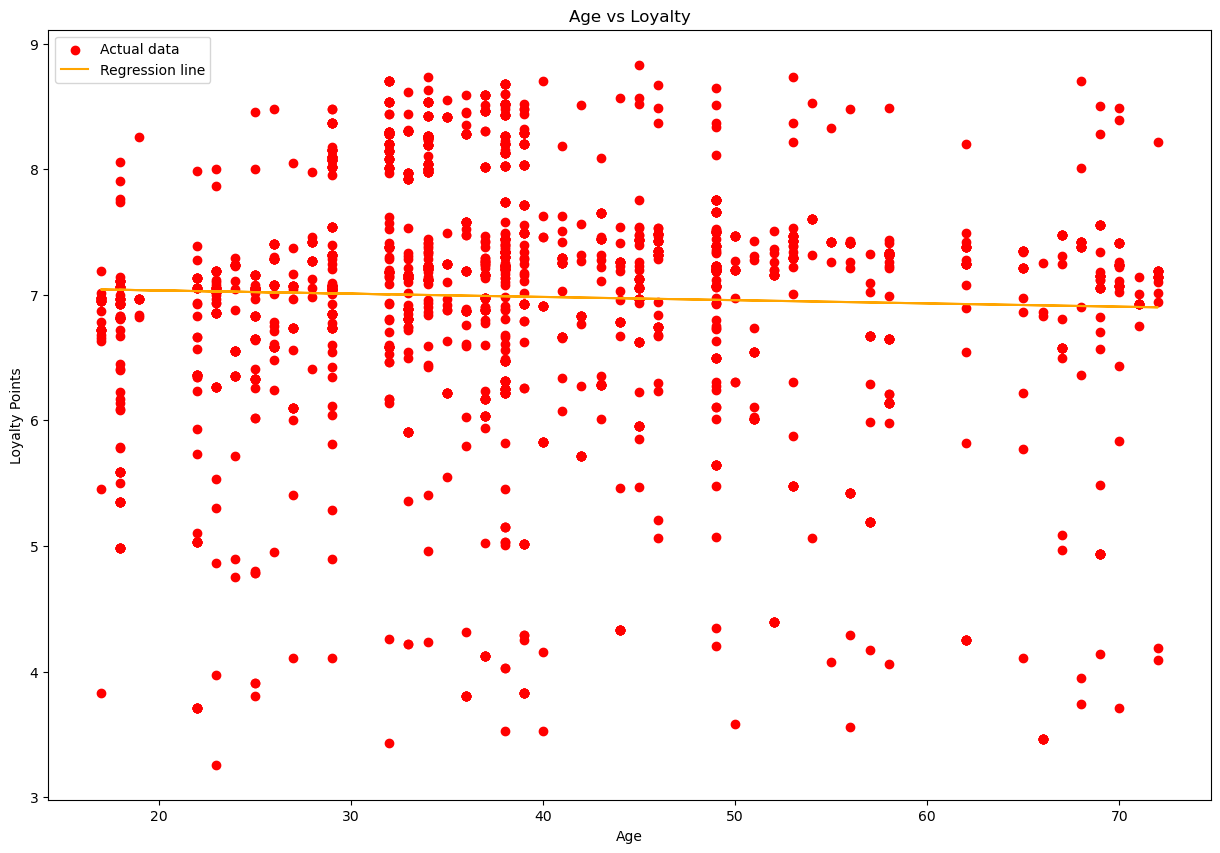

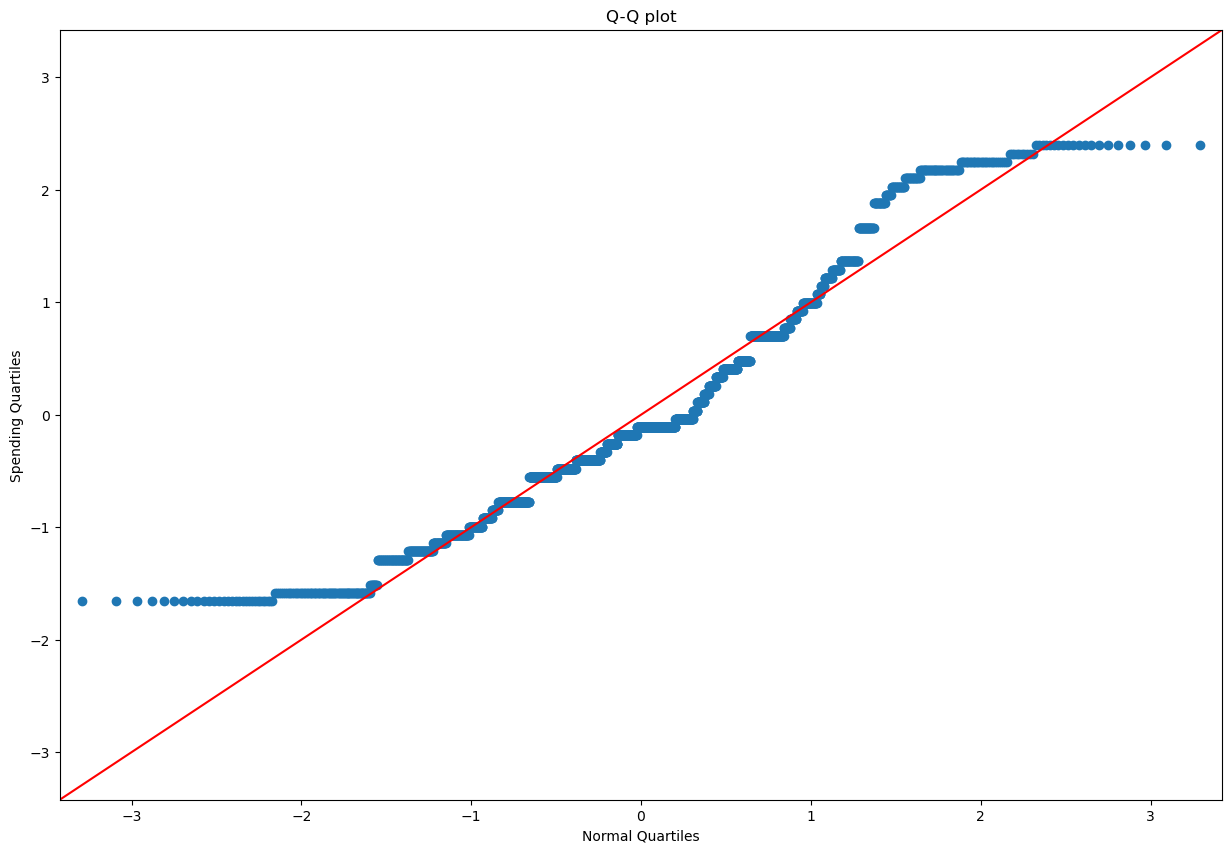

Shapiro-Wilk Test Statistic: 0.9524177312850952, p-value: 5.384232057927602e-25


{'r_squared': 0.001187527368261443,
 'intercept': 7.08613233682909,
 'coefficient': array([-0.00258215]),
 'shapiro_stat': 0.9524177312850952,
 'shapiro_p': 5.384232057927602e-25}

In [140]:
# Apply the function for x = 'age'
perform_linear_regression(x=reviews['age'], y=reviews['log_loyalty_points'], 
    x_label='Age', y_label='Loyalty Points', 
    plot_title='Age vs Loyalty', scatter_color='red', line_color='orange', 
    spending_score=reviews['age'])

#### Notes:
#### Summary of Findings:
- **Model Fit (R-squared)**: The model explains **0.18%** of the variance in the dependent variable, indicating an extremely weak fit.

### Check for VIF

In [144]:
# Function for checking the Variance inflation factor.
def calculate_vif(df, x_cols):
    X = df[x_cols]
    X = sm.add_constant(X)
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

In [145]:
# x_columns = ['spending_score', 'age', 'remuneration']
x_columns = ['spending_score', 'age', 'remuneration']
print(calculate_vif(reviews, x_columns))

          Feature        VIF
0           const  20.769030
1  spending_score   1.053014
2             age   1.053015
3    remuneration   1.000052


#### Notes: 
The VIF values for `spending_score`, `age`, and `remuneration` are all around 1, indicating no multicollinearity issues. These variables independently contribute to the prediction of loyalty points, and you can confidently include them in the model. The high VIF for the constant is expected and not a concern.

###

<a id="Multiple_Linear_Rregression"></a>
## 2.3 Multiple Linear Rregression

Use multiple linear regression to assess the linear relationships between loyalty points (dependent variable) and the numerical variables: age, remuneration, and spending scores. The goal is to determine if these continuous variables can effectively predict a customer's loyalty points.

**All the three indipendent variables**

In [155]:
# Function for performing multiple linear regression analysis.
def multiple_regression(df, y_col, x_cols):
    # Prepare the data
    X = df[x_cols]  # Multiple independent variables
    y = df[y_col]   # Dependent variable
    X = sm.add_constant(X)  # Adds the intercept term

    # Fit the OLS model
    model = sm.OLS(y, X).fit()

    # Print the model summary
    print(model.summary())

    # Plot the results
    visualise_results(df, y_col, x_cols, model)

    return model

def visualise_results(df, y_col, x_cols, model):
    # Residuals plot (Predicted vs Actual)
    plt.figure(figsize=(10, 6))
    predictions = model.predict(sm.add_constant(df[x_cols]))
    plt.scatter(predictions, model.resid, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Residuals Plot (Predicted vs Residuals)')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()

    # Distribution of residuals
    plt.figure(figsize=(10, 6))
    sns.histplot(model.resid, kde=True)
    plt.title('Distribution of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.show()


                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     3491.
Date:                Thu, 05 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:48:52   Log-Likelihood:                -15320.
No. Observations:                2000   AIC:                         3.065e+04
Df Residuals:                    1996   BIC:                         3.067e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2203.0598     52.361    -42.

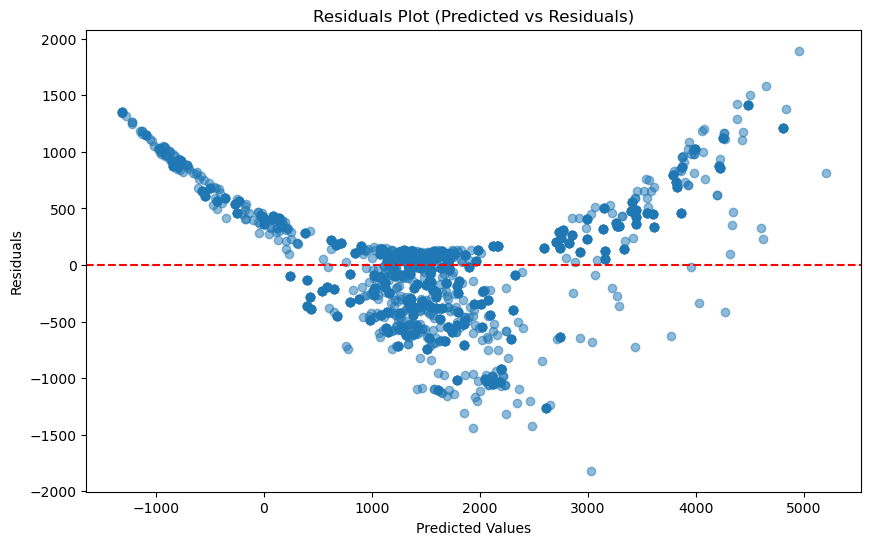

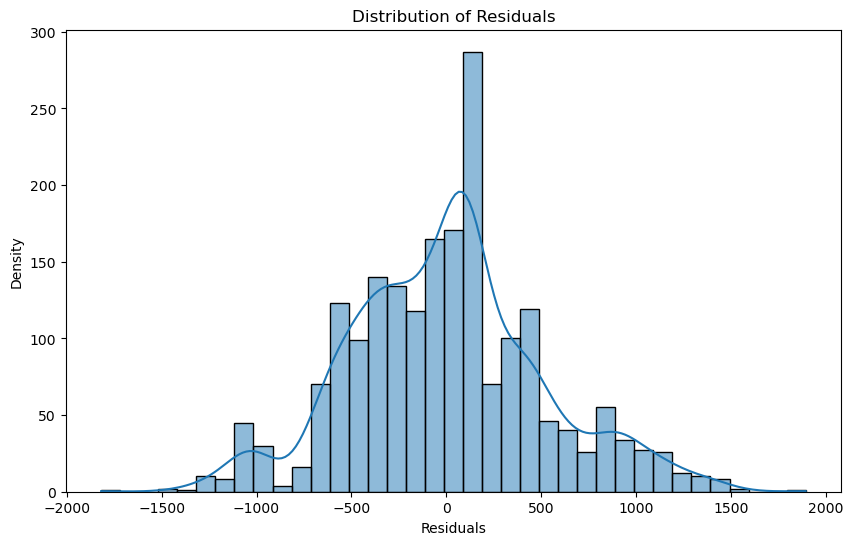

In [157]:
# Apply the function for the indipendent variables: 'spending_score', 'age' and 'remuneration'.
x_columns = ['spending_score', 'age', 'remuneration']  # Independent variables
multiple_regression(reviews, y_col='loyalty_points', x_cols=x_columns)

                            OLS Regression Results                            
Dep. Variable:     log_loyalty_points   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 4.931e+04
Date:                Thu, 05 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:48:52   Log-Likelihood:                 1447.8
No. Observations:                2000   AIC:                            -2888.
Df Residuals:                    1996   BIC:                            -2865.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.2490      0

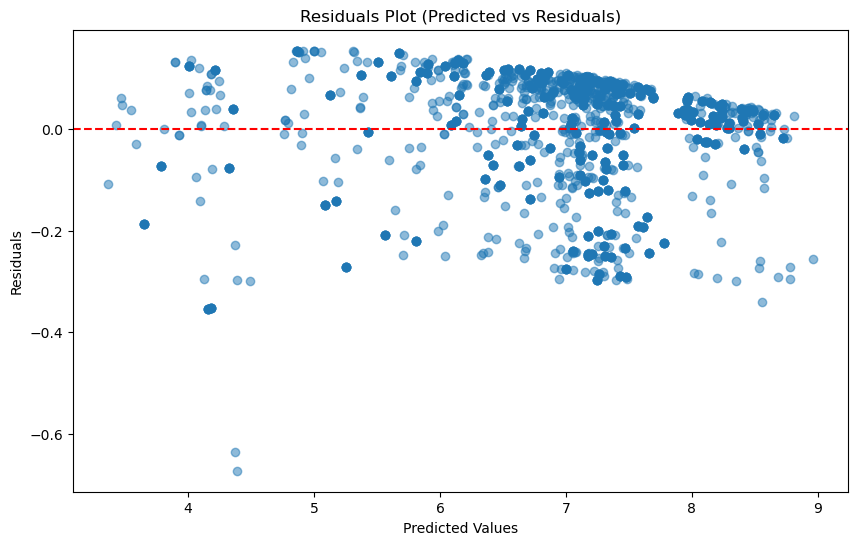

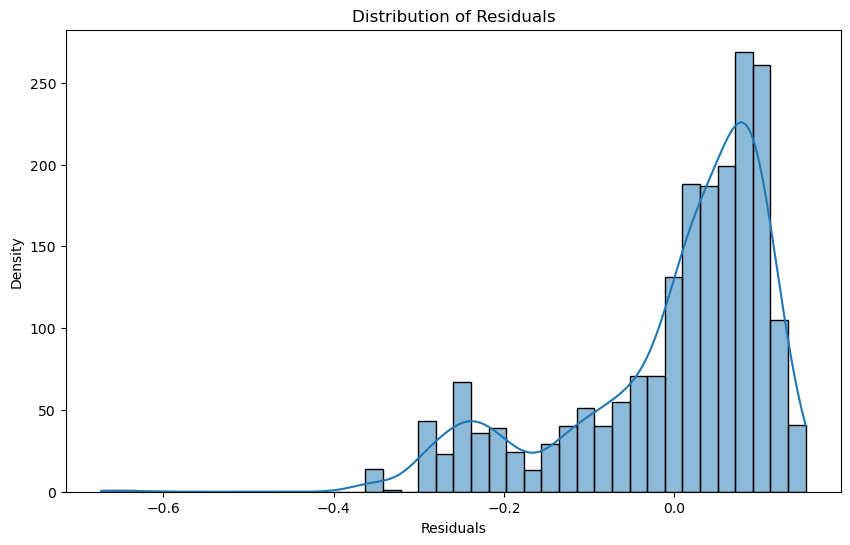

In [158]:
# Apply the function for the indipendent variables: 'log_spending_score', 'age' and 'log_remuneration'.
x_columns = ['log_spending_score', 'age', 'log_remuneration']  # Independent variables
multiple_regression(reviews, y_col='log_loyalty_points', x_cols=x_columns)

#### Notes:
Between the two models, the second one(log-log transformation) is significantly better, based on the following key points:

- **R-squared Comparison**:  the second model explains a much higher percentage of the variance in the dependent variable, indicating a stronger fit.
  - First Model: R-squared = 0.840 (84.0% variance explained)
  - Second Model: R-squared = 0.987 (98.7% variance explained)
- **Significance of Variables**: both models show that the independent variables are highly statistically significant (p-values = 0.000). However, the log-log transformation improves the precision and strength of the relationships.
- **F-statistic**: the second model has a much higher F-statistic (4.931e+04 compared to 3491), indicating that the overall model fit is better.

#### Conclusion:
The second model, which uses the logarithmic transformation of both the dependent and some independent variables, fits the data better as it captures the non-linear relationships more effectively, as reflected by the higher R-squared and better overall statistical fit.

#### Residuals Interpretation:
1. **First Model**:
   - Residuals vs. Predicted: Shows a curved pattern with non-linearity  and heteroscedasticity (changing variance), indicating a poor fit.
   - Residuals Distribution: Skewed with more extreme outliers, deviating from normality.
2. **Second Model**:
   - Residuals vs. Predicted: Residuals are more **randomly distributed** with **constant variance**, indicating a better fit.
   - Residuals Distribution: While this model has a better fit overall, the non-normal distribution of residuals suggests that there could still be issues with the model's specification.

#### Conclusion: 
Despite the skewness, the second model still performs better due to more consistent residual behavior. However, further model refinement could help address the normality issue.

**Excluding the variable age**

                            OLS Regression Results                            
Dep. Variable:     log_loyalty_points   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 4.667e+04
Date:                Thu, 05 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:48:54   Log-Likelihood:                 994.52
No. Observations:                2000   AIC:                            -1983.
Df Residuals:                    1997   BIC:                            -1966.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.9336      0

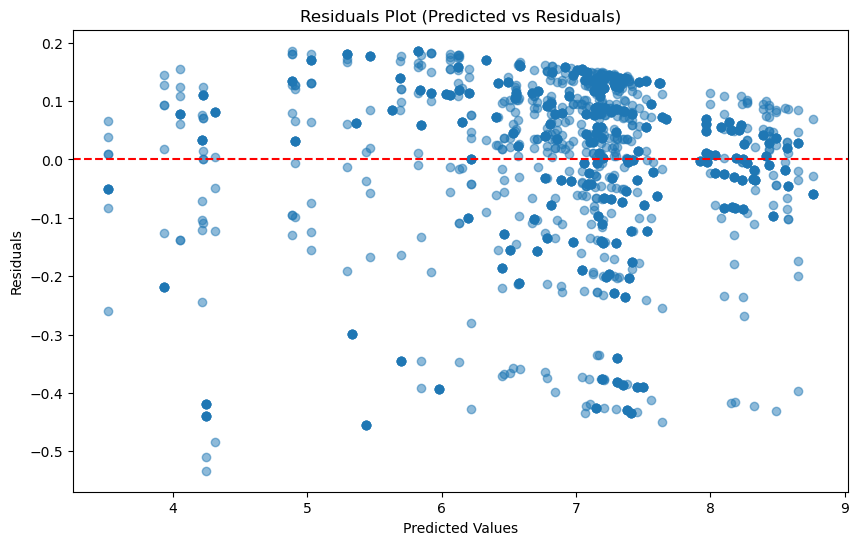

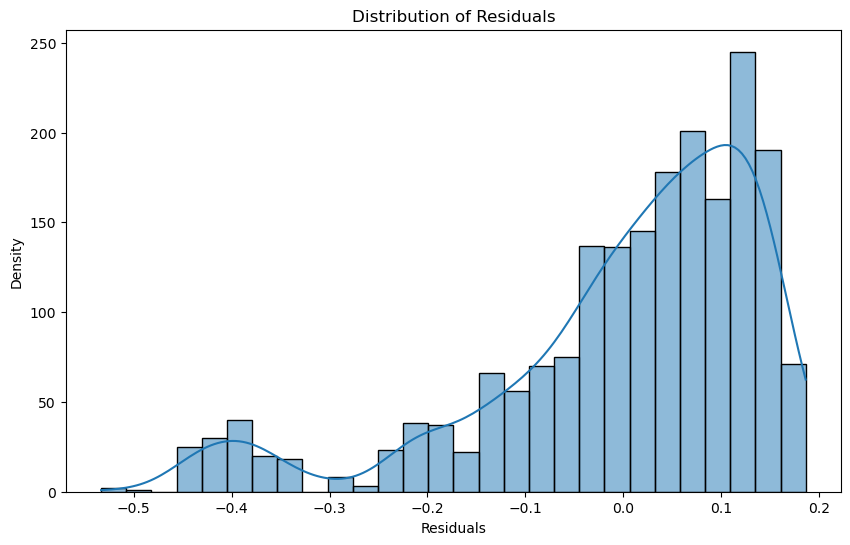

In [164]:
# Apply the function the the indipendent variables: 'spending_score', and 'remuneration'.
x_columns = ['log_spending_score', 'log_remuneration']  # Independent variables
multiple_regression(reviews, y_col='log_loyalty_points', x_cols=x_columns)

#### Notes:
The **first model** is better due to its higher **R-squared** (0.987 vs. 0.979) and lower **AIC** and **BIC** values, indicating a better fit and more explanatory power. Despite some skewness in residuals, it includes an additional predictor (age), which contributes to its superior performance over the second model.

**[Table of Contents](#Table_of_contents)**

# 

# 3. Decision Tree and Random Forest

Decision Trees and Random Forest.
Use a Decision Forest model to predict loyalty points based on gender, education, age, remuneration, and spending scores. This method, combining multiple decision trees in a random forest, captures complex patterns and offers more accurate predictions compared to linear models. The model also highlights the key factors driving customer loyalty.

<a id="Load_and_Prepare_the_Data"></a>
## 3.1 Load and Prepare the Data

In [172]:
# Create the new DataFrame.
df = pd.read_csv('clean_reviews.csv')

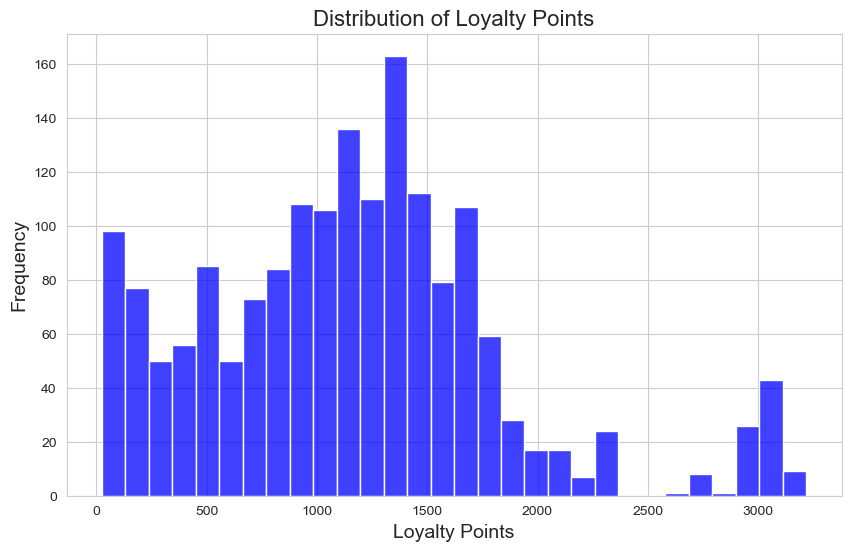

In [174]:
# Remove outliers.
Q1 = df['loyalty_points'].quantile(0.25)
Q3 = df['loyalty_points'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
outliers = df[(df['loyalty_points'] < lower_bound) | (df['loyalty_points'] > upper_bound)]

# Remove outliers.
df = df[(df['loyalty_points'] >= lower_bound) & (df['loyalty_points'] <= upper_bound)]

# Visulise the resulting 'loyalty_points' distribution.
# Plot the histogram for loyalty_points
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.histplot(df['loyalty_points'], bins=30, kde=False, color='blue')
plt.title('Distribution of Loyalty Points', fontsize=16)
plt.xlabel('Loyalty Points', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

In [175]:
# Start analysing the columns that are not numeric: gender, education.
df2 = df.drop(['age', 'product', 'review', 'summary'], axis=1)
df2.head()

gender  remuneration  spending_score  loyalty_points education
0    Male         12.30              39             210  graduate
1    Male         12.30              81             524  graduate
2  Female         13.12               6              40  graduate
3  Female         13.12              77             562  graduate
4  Female         13.94              40             366  graduate

In [178]:
# Log transformation for skewed variables.
# df2['log_loyalty_points'] = np.log(df2['loyalty_points'] + 1) 
# df2['log_remuneration'] = np.log(df2['remuneration'] + 1)      
# df2['log_spending_score'] = np.log(df2['spending_score'] + 1) 

# I decided not to apply the log transformation.

###

<a id="Decision_Tree_Model"></a>
## 3.2 Decision Tree Model

- **gender and education vs loyalty points**

In [183]:
# Sense-check the resulting data.
print(df2['gender'].value_counts())
print(df2['education'].value_counts())

gender
Female    973
Male      761
Name: count, dtype: int64
education
graduate        772
PhD             408
postgraduate    350
diploma         204
Name: count, dtype: int64


In [185]:
# Map the education levels to ordered values.
edu_order = {'diploma': 0, 'graduate': 1, 'postgraduate': 2, 'PhD': 3}
df2['education'] = df2['education'].map(edu_order)

# Create dummy variables for 'gender' column
gender_dummies = pd.get_dummies(df2['gender'], prefix='gender', drop_first=True)
df2 = pd.concat([df2, gender_dummies.astype(int)], axis=1)

# Drop the original string column
df2.drop(['gender'], axis=1, inplace=True)

# View the DataFrame
df2.head()

remuneration  spending_score  loyalty_points  education  gender_Male
0         12.30              39             210          1            1
1         12.30              81             524          1            1
2         13.12               6              40          1            0
3         13.12              77             562          1            0
4         13.94              40             366          1            0

### Exercise: fit the decision tree and prun it.

Mean Absolute Error:  494.21560682524375
Mean Squared Error:  428733.31550488924
Root Mean Squared Error:  654.7773022218236
R-squared: 0.006765507105903734


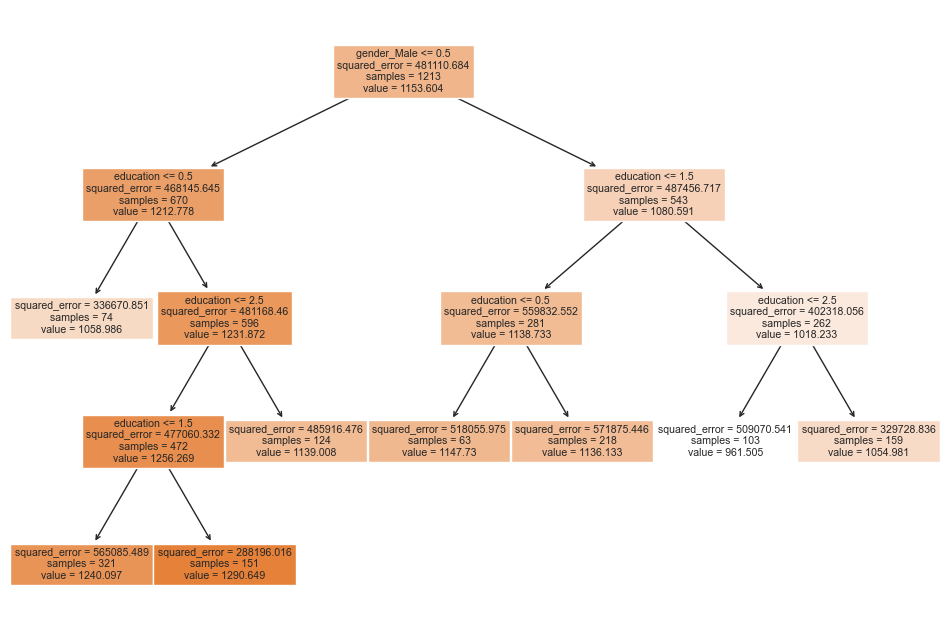

In [188]:
# Define X (independent variables) and y (target variable)
# I tried different approaches:
# X = df2.drop(columns=['remuneration', 'spending_score', 'loyalty_points', 'log_loyalty_points', 'log_remuneration', 'log_spending_score'])
# X = df2.drop(columns=['remuneration', 'spending_score', 'loyalty_points', 'log_loyalty_points'])
# y = df2['log_loyalty_points']

X = df2.drop(columns=['remuneration', 'spending_score', 'loyalty_points'])
y = df2['loyalty_points']

# Split the data into training and test sets (30% test, 70% train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)

# Fit the model
regressor.fit(X_train, y_train)

# Predict the response for the data test.
y_predict = regressor.predict(X_test)  

# Specify to print the MAE and MSE (to evaluate the accuracy of the new model).
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_predict))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_predict))
# Calculate the RMSE.
print("Root Mean Squared Error: ", math.sqrt(metrics.mean_squared_error(y_test, y_predict))) 
print("R-squared:", r2_score(y_test, y_predict))

# Visualize the Decision Tree
plt.figure(figsize=(12,8))
plot_tree(regressor, feature_names=X.columns, filled=True)
plt.show()

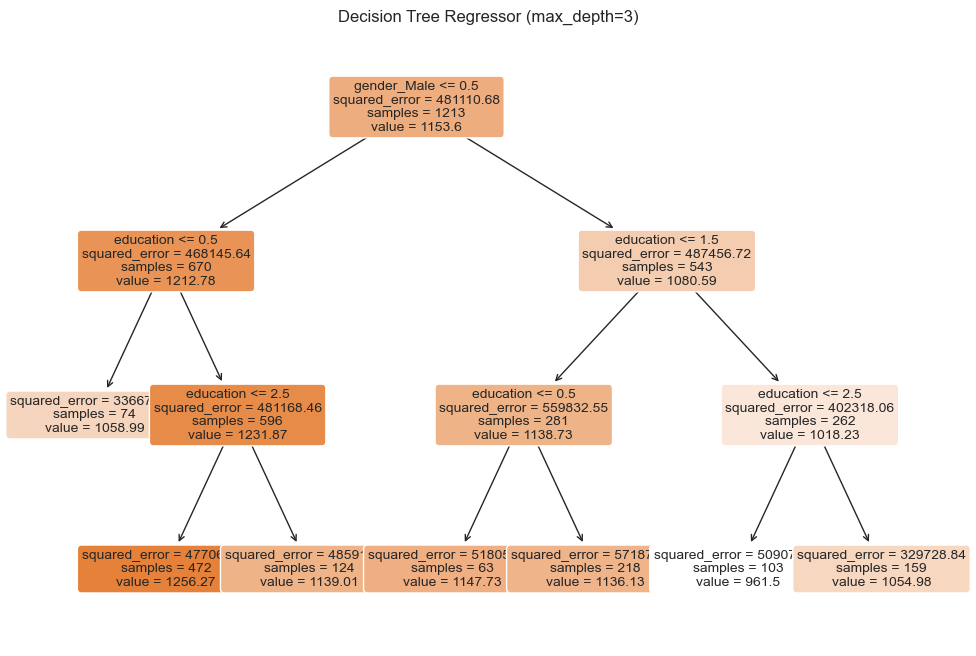

In [189]:
# Limit the depth of the tree for pruning
regressor_pruned = DecisionTreeRegressor(random_state=42, max_depth=3)
regressor_pruned.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(12, 8))  # Set the figure size
plot_tree(regressor_pruned, 
          feature_names=X_train.columns,  # Feature names from the DataFrame
          filled=True,   # Fill colors for nodes
          rounded=True,  # Rounded corners for nodes
          precision=2,   # Limit the precision of floating point numbers
          fontsize=10)   # Font size for the labels
plt.title("Decision Tree Regressor (max_depth=3)")
plt.show()

In [190]:
# Compare the performaance

# Predictions
y_pred = regressor.predict(X_test)
y_pred_pruned = regressor_pruned.predict(X_test)

# RMSE comparison
rmse_original = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_pruned = np.sqrt(mean_squared_error(y_test, y_pred_pruned))

print(f"Original RMSE: {rmse_original}")
print(f"Pruned RMSE: {rmse_pruned}")


Original RMSE: 654.7773022218236
Pruned RMSE: 653.9601666200327


**Use a function:**

In [195]:
# Build the model and interpret it.
def decision_tree_model(df, target_column, feature_columns=None, test_size=0.3, random_state=42, max_depth=None):
    """
    General function to build, evaluate, and visualize a decision tree regressor.
    """
    # If feature_columns is None, use all columns except the target column
    if feature_columns is None:
        X = df.drop(columns=[target_column])
    else:
        X = df[feature_columns]

    # Define the target variable
    y = df[target_column]

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Instantiate the DecisionTreeRegressor with optional pruning
    regressor = DecisionTreeRegressor(random_state=random_state, max_depth=max_depth)

    # Fit the model
    regressor.fit(X_train, y_train)

    # Predict on the test set
    y_pred = regressor.predict(X_test)

    # Evaluate the model performance (MSE, MAE, RMSE)
    mse = metrics.mean_squared_error(y_test, y_pred)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    R2 = r2_score(y_test, y_predict)

    # Print performance metrics
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared: {R2}")

    
    # Visualize the Decision Tree
    plt.figure(figsize=(12, 8))
    plot_tree(regressor, feature_names=X.columns, filled=True, rounded=True, precision=2, fontsize=10)
    plt.title(f"Decision Tree Regressor (max_depth={max_depth})")
    plt.show()

Mean Squared Error (MSE): 427663.89952570095
Mean Absolute Error (MAE): 494.3795033461446
Root Mean Squared Error (RMSE): 653.9601666200327
R-squared: 0.006765507105903734


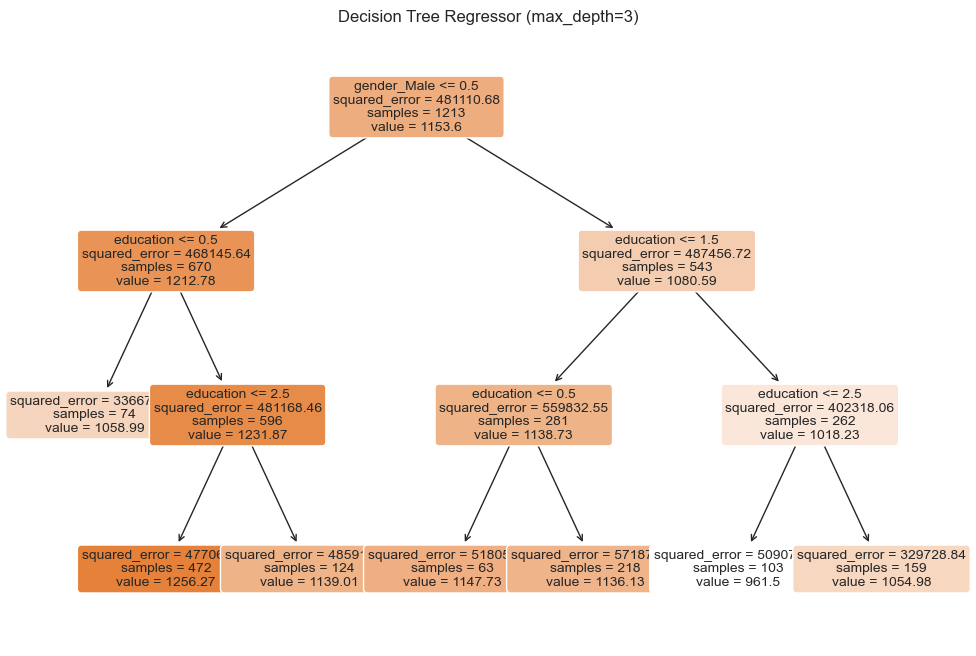

In [197]:
# Model 1: Gender and edducation vs loyalty points
decision_tree_model(df2, target_column='loyalty_points', feature_columns=['gender_Male', 'education'], max_depth=3)

education: 0.5380
gender_Male: 0.4620


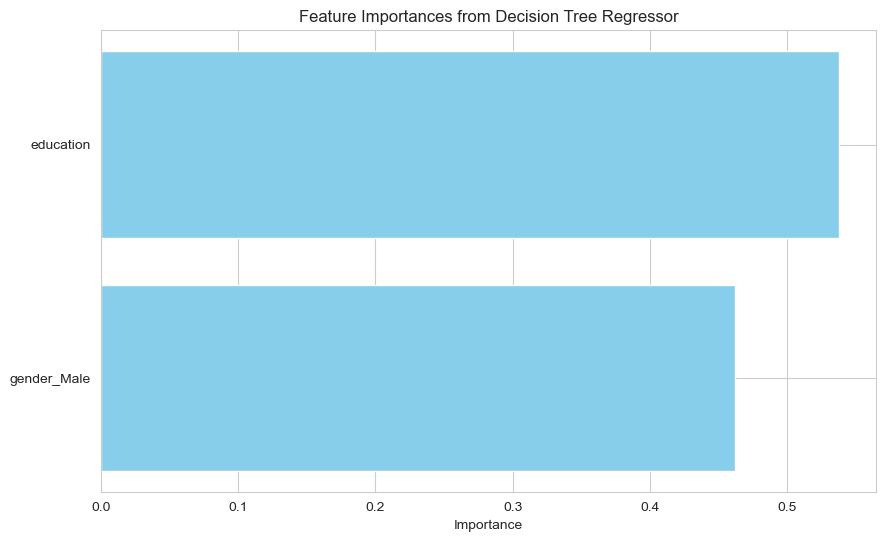

In [198]:
importance = regressor.feature_importances_
for feature, imp in zip(X_train.columns, importance):
    print(f"{feature}: {imp:.4f}")

# Create a DataFrame for better handling
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Decision Tree Regressor')
plt.gca().invert_yaxis()  # Invert y axis to have the most important feature on top
plt.show()

#### Notes:
- **Gender** is the most important feature at the root node, splitting the data into two groups. 

- **Education** plays a crucial role in differentiating loyalty points for both males and females: for males, higher education levels (education > 0.5) lead to higher predicted loyalty points, while lower education levels (education ≤ 0.5) result in lower loyalty points. 

- For females, the split occurs at a higher educational level, with higher education (education > 1.5) associated with higher loyalty points.s.


Mean Squared Error (MSE): 72791.00738501913
Mean Absolute Error (MAE): 202.52411153865384
Root Mean Squared Error (RMSE): 269.7980863257172
R-squared: 0.006765507105903734


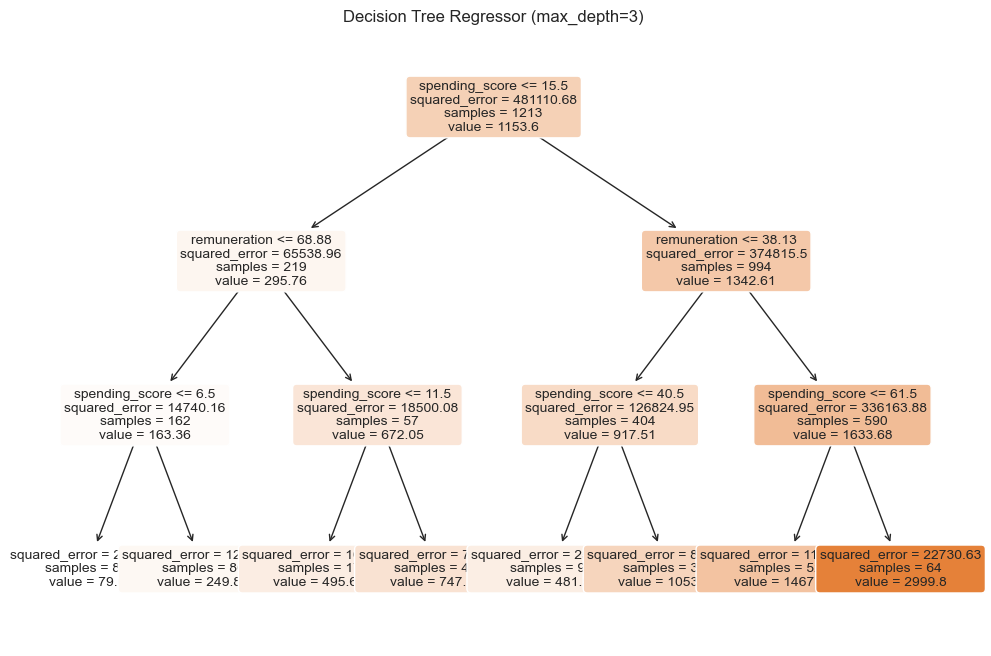

In [202]:
# Model 2: Remuneration and spending score vs loyalty points.
decision_tree_model(df2, target_column='loyalty_points', feature_columns=['remuneration', 'spending_score'], max_depth=3)

remuneration: 0.5380
spending_score: 0.4620


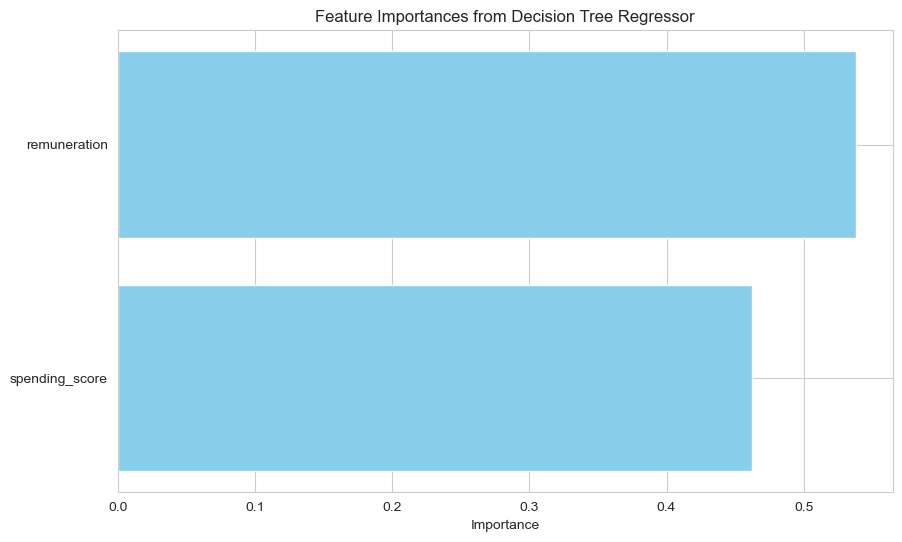

In [203]:
importance = regressor.feature_importances_

# Print feature importances
for feature, imp in zip(['remuneration', 'spending_score'], importance):
    print(f"{feature}: {imp:.4f}")

# Create a DataFrame for better handling
feature_importance_df2b = pd.DataFrame({'Feature': ['remuneration', 'spending_score'], 'Importance': importance})

# Sort the DataFrame by importance
feature_importance_df2b = feature_importance_df2b.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df2b['Feature'], feature_importance_df2b['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Decision Tree Regressor')
plt.gca().invert_yaxis()  # Invert y axis to have the most important feature on top
plt.show()

#### Notes:

- Spending score is the primary factor for predicting loyalty points, while remuneration comes next.

- **Spending score** emerges as the most important factor in predicting loyalty points. Individuals with a spending score of 15.5 or below generally accumulate fewer loyalty points, while those with higher spending scores see a significant increase in their points. 

- **Remuneration** then plays a secondary role, particularly for individuals with spending scores above 15.5, helping to further differentiate their loyalty point further.
.


Mean Squared Error (MSE): 44658.33108326388
Mean Absolute Error (MAE): 151.71499928960728
Root Mean Squared Error (RMSE): 211.32517853598014
R-squared: 0.006765507105903734


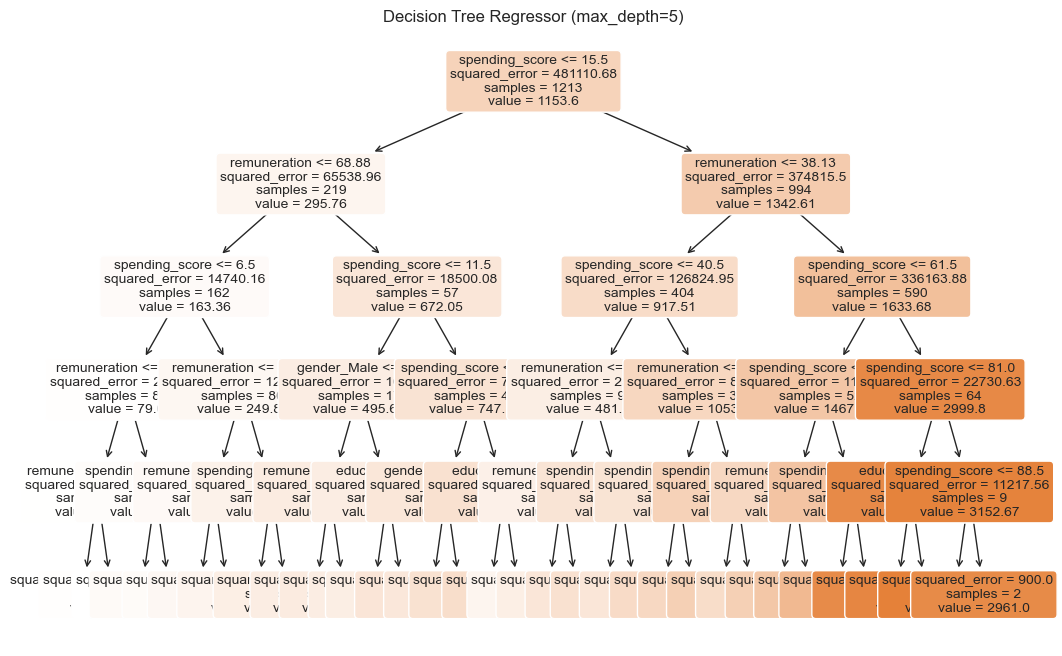

In [207]:
# Model 3: Gender, education, remuneration and spending score vs loyalty points.
decision_tree_model(df2, target_column='loyalty_points', feature_columns=['gender_Male', 'education', 'remuneration', 'spending_score'], max_depth=5)

**Notes:**

I trained three decision tree models. Model 1 used ‘gender_Male’ and ‘education’ as predictors, yielding an RMSE of 653 and a very low R-squared, suggesting poor predictive power. Model 2, using `remuneration` and `spending_score`, performed better with an RMSE of 269, but R-squared remained low. Model 3 combined all four variables but showed no significant improvement over Model 2.

###

<a id="Random_Forest"></a>
## 3.3 Random Forest

In [211]:
# Create your new DataFrame.
df = pd.read_csv('clean_reviews.csv')

# Split the data
x_columns = ['spending_score', 'age', 'remuneration']
X = df[x_columns]
y = df['loyalty_points']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions for the test and train sets
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

# Performance metrics
print("Random Forest RMSE (Test):", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("Random Forest R-squared (Test):", r2_score(y_test, y_pred_test))

# Evaluate on the training set
print("Random Forest RMSE (Train):", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("Random Forest R-squared (Train):", r2_score(y_train, y_pred_train))


Random Forest RMSE (Test): 72.7943676375446
Random Forest R-squared (Test): 0.996732373735492
Random Forest RMSE (Train): 25.528464950913126
Random Forest R-squared (Train): 0.9996054427370169


### Cross validation

In [213]:
# Perform 5-fold cross-validation for a random forest model
scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated RMSE:", np.mean(np.sqrt(-scores)))

Cross-validated RMSE: 58.81994001282133


The Random Forest model's RMSE of 72.79 and cross-validated RMSE of 58.82, when compared to a loyalty points range of 25 to 6847, indicate relatively low error in predicting the points. The cross-validated RMSE being lower than the base RMSE suggests good model generalization to unseen data. The error margin is small compared to the scale of the data, showing that the model is performing well. 

### Visualising Random Forest model results:

In [217]:
# Residual Plot
# 'y_test' is the actual values and 'y_pred' is the predicted values from a model
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

ValueError: operands could not be broadcast together with shapes (400,) (521,) 

#### Notes:
Looking at the residual plot, most residuals are concentrated around zero, indicating that the model is performing well for most of the predictions. However, there are a few notable outliers. These outliers suggest that the model struggles with extreme values.

In [ ]:
# Prediction vs Actual plot.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


In [ ]:
# Now you can access feature importances
importances = rf.feature_importances_  # Random Forest model feature importance
indices = np.argsort(importances)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(range(len(importances)), [X.columns[i] for i in indices])
plt.xlabel('Importance')
plt.show()

#### Notes:

1. **Spending Score**: This feature has the highest importance, contributing significantly to predicting the target variable (loyalty points). Its importance score is over **0.5**, meaning it plays a dominant role in explaining the variability of loyalty points.

2. **Remuneration**: This feature also has a considerable impact, though slightly less than spending score, with an importance score slightly above **0.3**. This suggests that customer earnings are also critical in understanding their loyalty behavior but are secondary to spending behavior.

3. **Age**: This feature has a much smaller contribution compared to the other two, with an importance score below **0.1**. While age does impact the model, it is far less influential in comparison to spending score and remuneration.

### Conclusion:
The model suggests that **spending score** and **remuneration** are the two most influential factors in predicting customer loyalty points. The lower importance of **age** indicates that demographic factors may not be as crucial in comparison to behavioral or financial factors in this context.

In [ ]:
# RMSE values for different models
model_names = ['OLS Regression', 'Random Forest (No Age)', 'Random Forest (With Age)']
rmse_values = [58.82, 171.92, 142.46]

df_rmse = pd.DataFrame({
    'Model': model_names,
    'RMSE': rmse_values
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='RMSE', data=df_rmse, palette='viridis')
plt.title('RMSE Comparison Across Models')
plt.ylabel('RMSE')
plt.show()


In [ ]:
train_sizes, train_scores, test_scores = learning_curve(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate mean and standard deviation for training and test set scores
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training error')
plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Test error')
plt.title('Learning Curves for Random Forest')
plt.xlabel('Training Size')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.show()

**[Table of Contents](#Table_of_contents)**

# 

<a id="k-means_Clustering"></a>
# 4 *k*-means Clustering

K-means clustering reveals distinct customer segments based on engagement and purchasing power, offering valuable insights into their behavior. This analysis helps identify key groups within the customer base, enabling more targeted and effective marketing strategies tailored to each segment's needs.


In [224]:
# Load the CSV file(s) as df3.
df3 = pd.read_csv('clean_reviews.csv')

# View DataFrame.
df3.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

- **Remuneration vs Spending score**

#### Clustering

In [228]:
# Select necessary columns.
df3a = df3[['remuneration', 'spending_score']]

# Explore the data.
df3a.info()

# Descriptive statistics.
df3a.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


remuneration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000

In [230]:
def clustering_visualizations(df, x, y, scatter_title, pairplot_title, elbow_title, silhouette_title):
    # Scatter plot
    scatter = sns.scatterplot(x=x, y=y, data=df)
    plt.title(scatter_title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    # Pairplot
    pairplot = sns.pairplot(df, diag_kind='kde')
    plt.suptitle(pairplot_title, y=1.02)
    plt.show()

    # Elbow method
    ss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(df)
        ss.append(kmeans.inertia_)
    
    plt.plot(range(1, 11), ss, marker='o')
    plt.title(elbow_title)
    plt.xlabel("Number of clusters")
    plt.ylabel("SS distance")
    plt.show()

    # Silhouette method
    sil = []
    kmax = 10
    for k in range(2, kmax+1):
        kmeans_s = KMeans(n_clusters=k).fit(df)
        labels = kmeans_s.labels_
        sil.append(silhouette_score(df, labels, metric='euclidean'))
    
    plt.plot(range(2, kmax+1), sil, marker='o')
    plt.title(silhouette_title)
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette Score")
    plt.show()


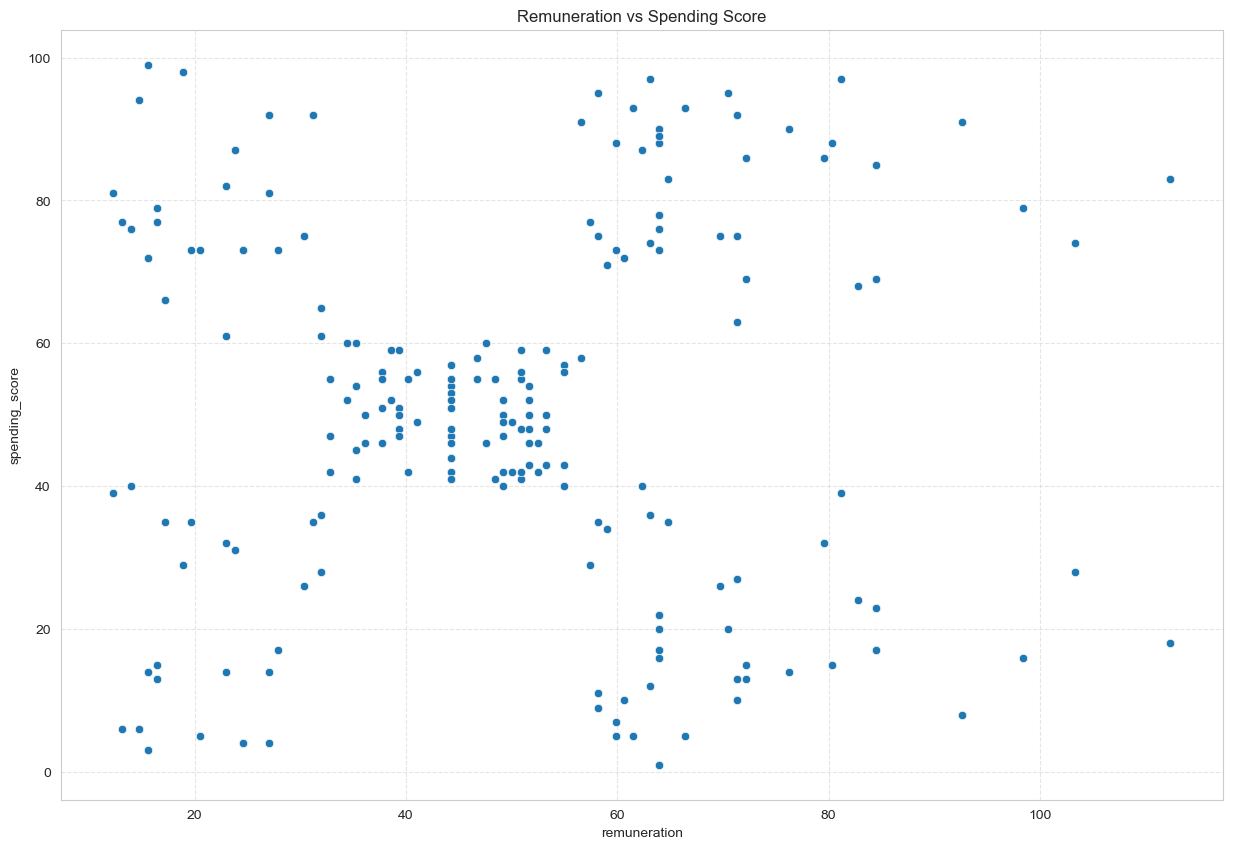

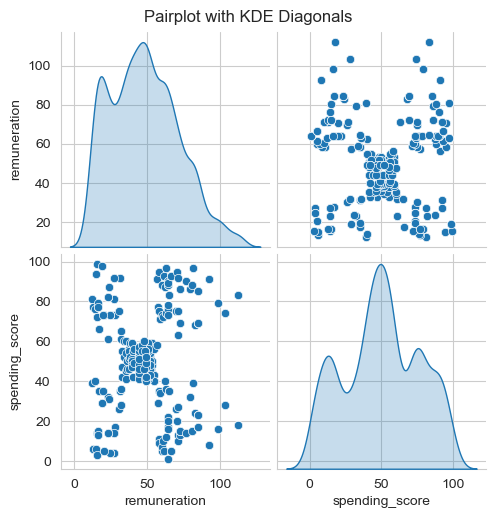

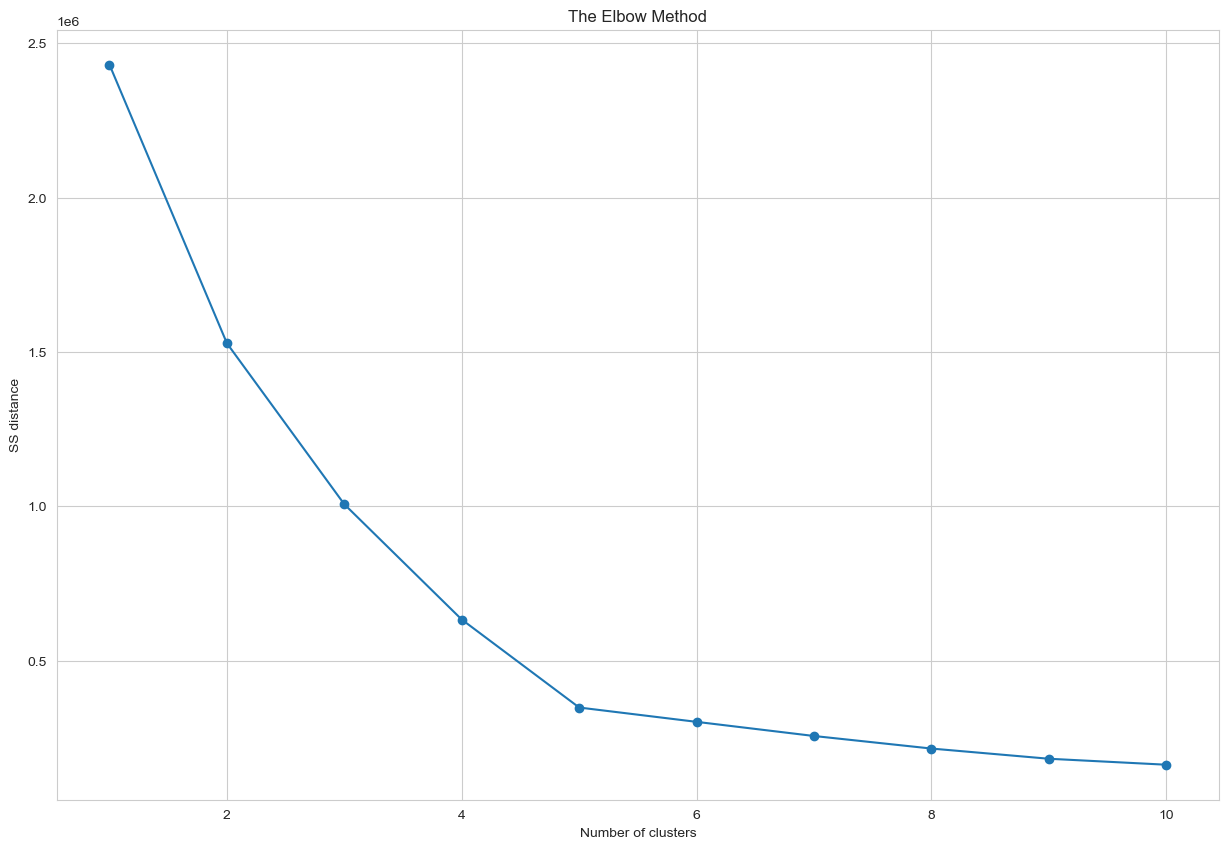

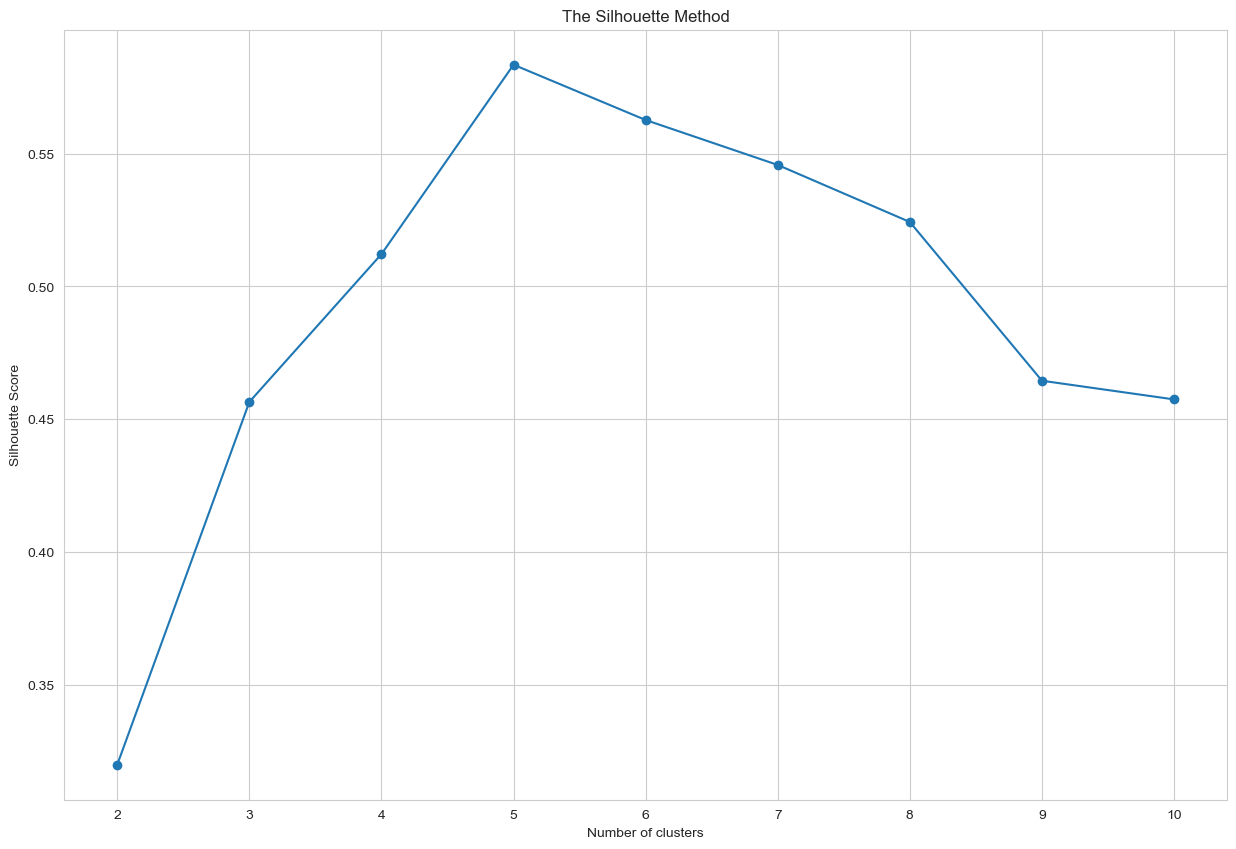

In [232]:
# Apply the function.
clustering_visualizations(df3a, 'remuneration', 'spending_score',
                          scatter_title="Remuneration vs Spending Score",
                          pairplot_title="Pairplot with KDE Diagonals",
                          elbow_title="The Elbow Method",
                          silhouette_title="The Silhouette Method")



#### Evaluate k-means model at different values of *k*

In [233]:
def plot_kmeans_clusters(df, n_clusters, filename=None):
    """
    Performs K-Means clustering and plots the resulting clusters using a pairplot.
    Saves the plot to an image file if a filename is provided.
    
    """
    # Fit K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters,
                    max_iter=15000,
                    init='k-means++',
                    random_state=42).fit(df)

    # Add cluster labels to the DataFrame
    df['K-Means Predicted'] = kmeans.labels_

    # Plot the pairplot with clusters
    sns.pairplot(df, hue='K-Means Predicted', diag_kind='kde')

    # Save the plot to the specified file
    if filename is None:
        filename = f'kmeans_clusters_{n_clusters}.png'
    
    plt.savefig(filename)
    plt.show()



K-means model with 4 clusters


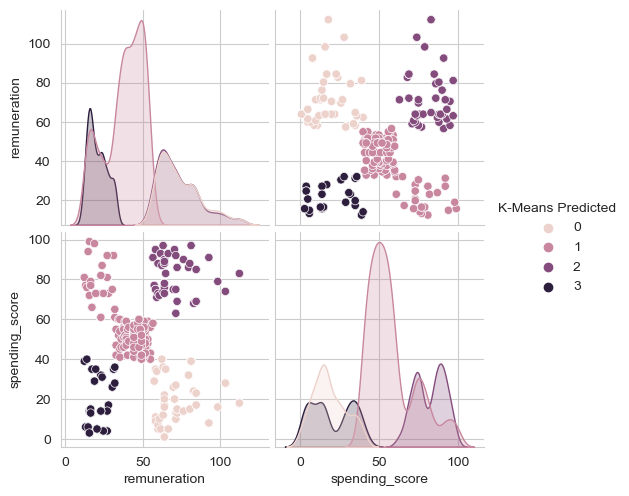


K-means model with 5 clusters


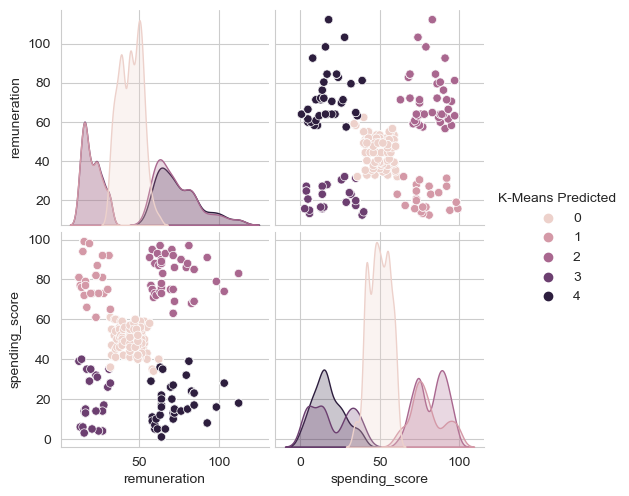

In [234]:
# Evaluate the presence of 4 and 5 groups.
print('\n\033[1mK-means model with 4 clusters\033[0m')
plot_kmeans_clusters(df3a, 4)

print('\n\033[1mK-means model with 5 clusters\033[0m')
plot_kmeans_clusters(df3a, 5)

#### Notes: 

There are five clear clusters identified, each with varying characteristics:

- **Cluster 0**: This group shows a concentration of customers with relatively low spending scores and remuneration. They are likely to be lower spenders with limited purchasing power.

- **Cluster 1**: This segment includes customers with moderate remuneration and mid-range spending scores. They likely represent an average customer base in terms of both income and spending behavior.

- **Cluster 2**: This group represents a concentration of customers with high spending scores but low to moderate remuneration. They could be customers who, despite having a lower income, are heavy spenders, perhaps through savings or credit.

- **Cluster 3**: These customers have high remuneration and high spending scores, representing the premium, high-value customers. This segment is critical for targeting upscale marketing strategies and high-end products.

- **Cluster 4**: This segment shows customers with high remuneration but relatively lower spending scores. They may have the potential for higher spending but aren't currently engaging as heavily as expected based on their income.ir income.

#### Fit final model

In [237]:
# Apply the KMeans model
kmeans = KMeans(n_clusters=5,  # Adjust the number of clusters if needed
                max_iter=15000,
                init='k-means++',
                random_state=42)

# Fit the model on your DataFrame
kmeans.fit(df3a)

# Get cluster labels and assign them to the DataFrame
df3a['K-Means Predicted'] = kmeans.labels_

# Print the cluster centers (centroids)
print("Cluster Centers (Centroids):")
print(kmeans.cluster_centers_)

# Calculate and print the average spending score for each cluster
print("\nAverage spending score per cluster:")
cluster_means = df3a.groupby('K-Means Predicted')[['spending_score']].mean()
print(cluster_means)


Cluster Centers (Centroids):
[[4.44187855e+01 4.95297158e+01 1.33226763e-15]
 [2.03536803e+01 7.94163569e+01 1.00000000e+00]
 [7.32402809e+01 8.20084270e+01 2.00000000e+00]
 [2.04243542e+01 1.97638376e+01 3.00000000e+00]
 [7.48312121e+01 1.74242424e+01 4.00000000e+00]]

Average spending score per cluster:
                   spending_score
K-Means Predicted                
0                       49.529716
1                       79.416357
2                       82.008427
3                       19.763838
4                       17.424242


In [238]:
# Check the number of observations per predicted class.
df3a['K-Means Predicted'].value_counts()

K-Means Predicted
0    774
2    356
4    330
3    271
1    269
Name: count, dtype: int64

- **Spending score vs loyalty points**

#### Clustering

In [245]:
# Select necessary columns.
df3b = df3[['spending_score', 'loyalty_points']]

# Explore the data.
df3b.info()

# Descriptive statistics.
df3b.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   spending_score  2000 non-null   int64
 1   loyalty_points  2000 non-null   int64
dtypes: int64(2)
memory usage: 31.4 KB


spending_score  loyalty_points
count     2000.000000     2000.000000
mean        50.000000     1578.032000
std         26.094702     1283.239705
min          1.000000       25.000000
25%         32.000000      772.000000
50%         50.000000     1276.000000
75%         73.000000     1751.250000
max         99.000000     6847.000000

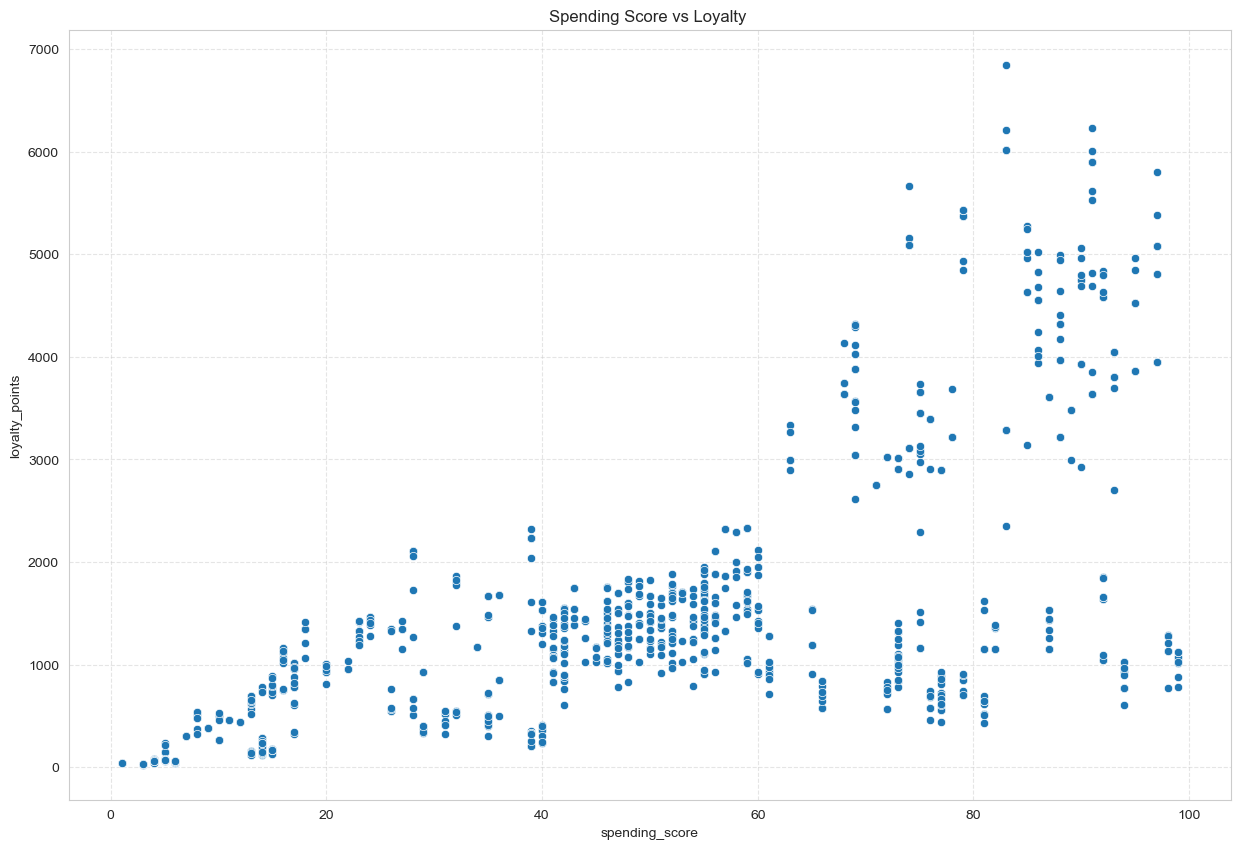

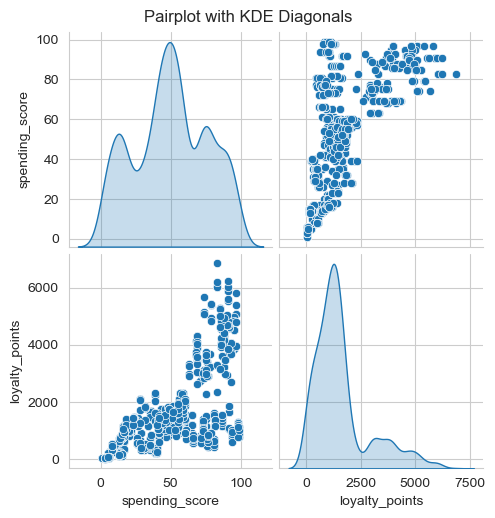

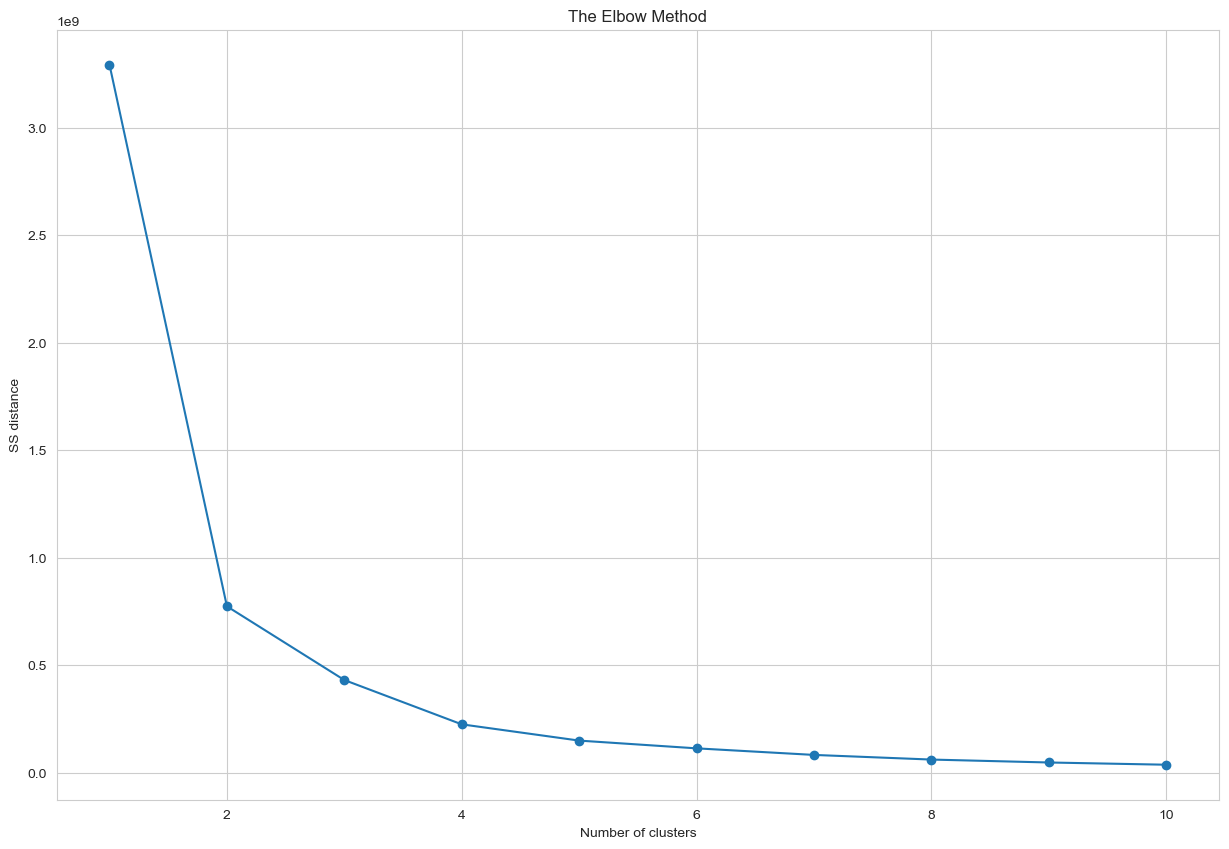

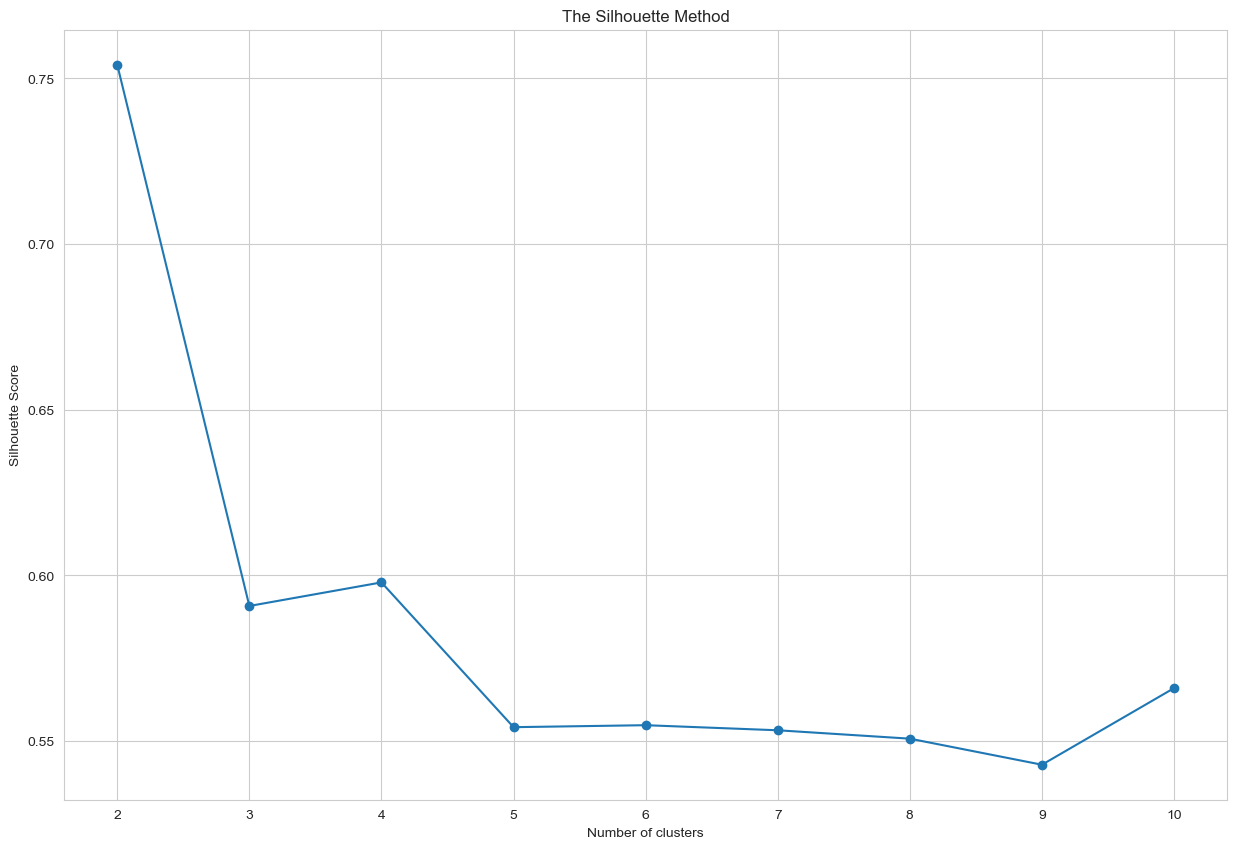

In [247]:
clustering_visualizations(df3b, 'spending_score', 'loyalty_points',
                          scatter_title="Spending Score vs Loyalty ",
                          pairplot_title="Pairplot with KDE Diagonals",
                          elbow_title="The Elbow Method",
                          silhouette_title="The Silhouette Method")

#### Evaluate k-means model at different values of *k*


K-means model with 3 clusters


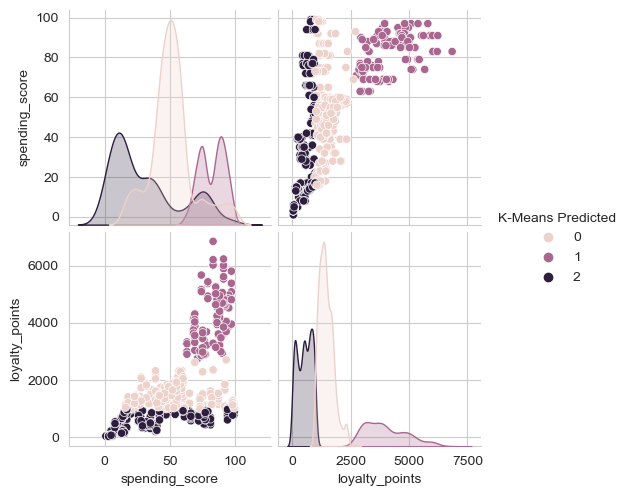


K-means model with 4 clusters


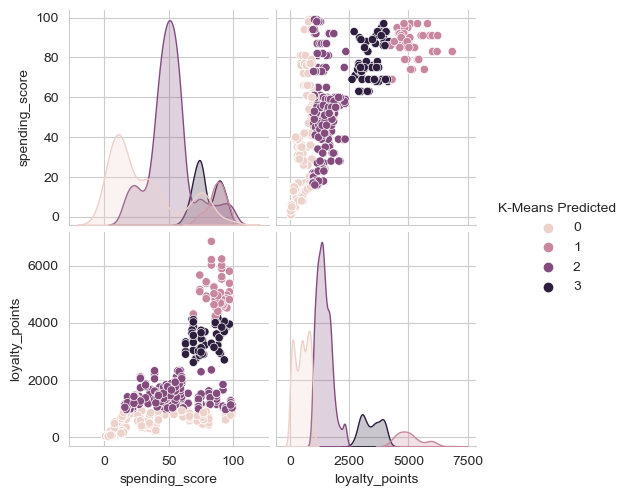

In [249]:
# Evaluate the presence of 3 and 4 groups.
print('\n\033[1mK-means model with 3 clusters\033[0m')
plot_kmeans_clusters(df3b, 3)

print('\n\033[1mK-means model with 4 clusters\033[0m')
plot_kmeans_clusters(df3b, 4)

#### Notes: 
There are 3 clusters based on spending score and loyalty points:

- **Cluster 0**: Low spending score and low loyalty points, likely representing less engaged or inactive customers. This group may not be contributing significantly to sales or loyalty programs.
  
- **Cluster 1**: High spending score and high loyalty points, representing highly engaged, valuable customers. These customers are likely consistent spenders who are very loyal to the brand.

- **Cluster 2**: Moderate spending score but low loyalty points, possibly indicating customers who spend a moderate amount but aren't as engaged with the loyalty program. There could be potential to increase loyalty among this group through targeted marketing strategies.

#### Fit final model

In [252]:
# Apply the KMeans model
kmeans = KMeans(n_clusters=3,  # Adjust the number of clusters if needed
                max_iter=15000,
                init='k-means++',
                random_state=42)

# Fit the model on your DataFrame
kmeans.fit(df3b)

# Get cluster labels and assign them to the DataFrame
df3b['K-Means Predicted'] = kmeans.labels_

# Print the cluster centers (centroids)
print("Cluster Centers (Centroids):")
print(kmeans.cluster_centers_)

# Calculate and print the average loyalty points for each cluster
print("\nAverage loyalty points per cluster:")
cluster_means = df3b.groupby('K-Means Predicted')[['spending_score']].mean()
print(cluster_means)

Cluster Centers (Centroids):
[[5.12773797e+01 1.43835722e+03 2.00204708e+00]
 [8.20312500e+01 4.00525000e+03 2.29545455e+00]
 [3.13368107e+01 5.08108793e+02 5.66318927e-02]]

Average loyalty points per cluster:
                   spending_score
K-Means Predicted                
0                       51.277380
1                       82.031250
2                       31.336811


In [253]:
# Check the number of observations per predicted class.
df3b['K-Means Predicted'].value_counts()

K-Means Predicted
0    977
2    671
1    352
Name: count, dtype: int64

**[Table of Contents](#Table_of_contents)**

# 

<a id="NLP_and_Naive_Bayes_Classifier"></a>
# 5. NLP and Naive Bayes Classifier

The aim of this analysis is to examine customer feedback through text analysis, focusing on reviews and summaries, in order to identify key patterns, sentiment, and common themes, ultimately providing insights that can inform targeted marketing strategies and improve customer engagement.

### Load and explore the data

In [75]:
sia = SentimentIntensityAnalyzer()

In [77]:
# Load the data set as df3.
df3 = pd.read_csv('clean_reviews.csv')

# Keep necessary columns. Drop unnecessary columns.
df3  = df3[['review','summary']]

# Determine if there are any missing values.
print(f"Missing values:")
df3[['review', 'summary']].isna().sum()

Missing values:


review     0
summary    0
dtype: int64

In [79]:
# Explore data set.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [81]:
# View DataFrame.
df3.head()

review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## Prepare the data for NLP

In [260]:
# Define a function to prepare the data.
def preprocess_text_columns(df, columns):
    """
    Preprocess text columns: change to lowercase, remove punctuation, 
    remove alphanumeric characters, and drop duplicates based on all specified columns.
    """
    # Process each column in the provided list
    for col in columns:
        # 1. Change text to lowercase and join elements (if split)
        df[col] = df[col].apply(lambda x: " ".join(x.lower().strip() for x in str(x).split()))
        
        # 2. Remove punctuation from the text
        df[col] = df[col].str.replace(r'[^\w\s]', '', regex=True)

        # 3. Remove alphanumeric characters (only keep alphabetic characters)
        df[col] = df[col].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x).strip())
        
        # 4. Drop duplicates based on all specified columns
        df = df.drop_duplicates(subset=[col])

        # 5. Reset index after dropping duplicates
        df.reset_index(drop=True, inplace=True)
    
    return df

In [262]:
# Define the columns you want to process (review and summary)
text_columns = ['review', 'summary']

# Preprocess the text columns
clean_df = preprocess_text_columns(df3, text_columns)

# View the preprocessed DataFrame
print(f"df shape:", clean_df.shape)

# Check for remaining duplicate values in the 'review' column
print(f"\nDuplicates:")
print(clean_df['review'].duplicated().sum())
print(clean_df['summary'].duplicated().sum())

df shape: (1348, 9)

Duplicates:
0
0


In [264]:
clean_df.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  when it comes to a dms screen the space on the...   
1      466  an open letter to galeforce your unpainted min...   
2      254  nice art nice printing why two panels are fill...   
3      263  amazing buy bought it as a gift for our new dm...   
4      291  as my review of gfs previous screens these wer...   

                                             summary  
0  the fact that  of this space is wasted on art ...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

## Create wordclouds and Frequency distribution

In [267]:
# Define the function:
def tokenize_and_wordcloud(df, columns, colormaps):
    """
    Tokenize text, create word clouds, and generate frequency distribution.
    Removes stopwords during tokenization.
    """
    if len(columns) != len(colormaps):
        raise ValueError("The number of columns must match the number of colormaps.") 
    
    stop_words = set(stopwords.words('english'))  # Load stopwords list
    freq_dists = {}
    
    for i, col in enumerate(columns):
        # Tokenize the text column and remove stopwords
        df[f'{col}_tokens'] = df[col].apply(
            lambda x: [word for word in word_tokenize(str(x)) if word.lower() not in stop_words and word.isalpha()]
        )
        
        # Create a single string of all tokens for the WordCloud
        all_text = ' '.join([' '.join(tokens) for tokens in df[f'{col}_tokens']])
        
        # Generate a WordCloud with the specified colormap for this column
        wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=colormaps[i]).generate(all_text)

        # Plot the WordCloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'WordCloud for {col}', fontsize=16)
        plt.show()
        
        # Generate Frequency Distribution
        all_tokens = [token for tokens in df[f'{col}_tokens'] for token in tokens]
        freq_dist = FreqDist(all_tokens)
        
        # Store the frequency distribution in the dictionary
        freq_dists[col] = freq_dist
        
        # Plot the 20 most common words
        plt.figure(figsize=(10, 5))
        freq_dist.plot(20, cumulative=False, title=f'Frequency Distribution for {col}')
        plt.show()

         # Print the most common words
        most_common = freq_dist.most_common(20)  # Get the top 20 most common words
        print(f'Most common words for {col}:')
        for word, count in most_common:
            print(f'{word}: {count}')
        print('\n')  
    
    return freq_dists

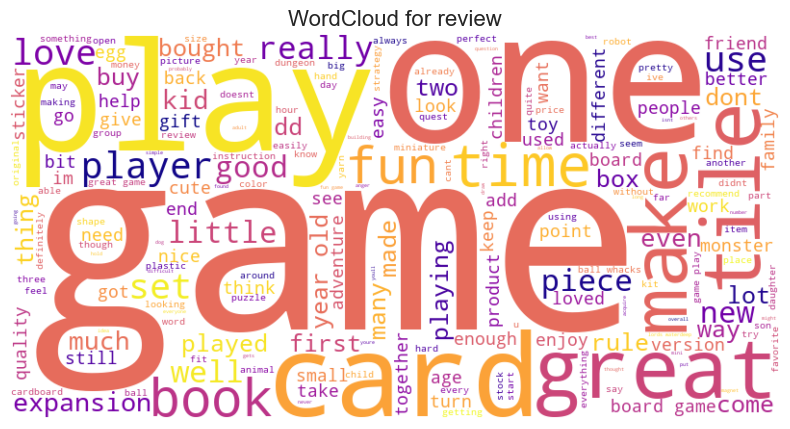

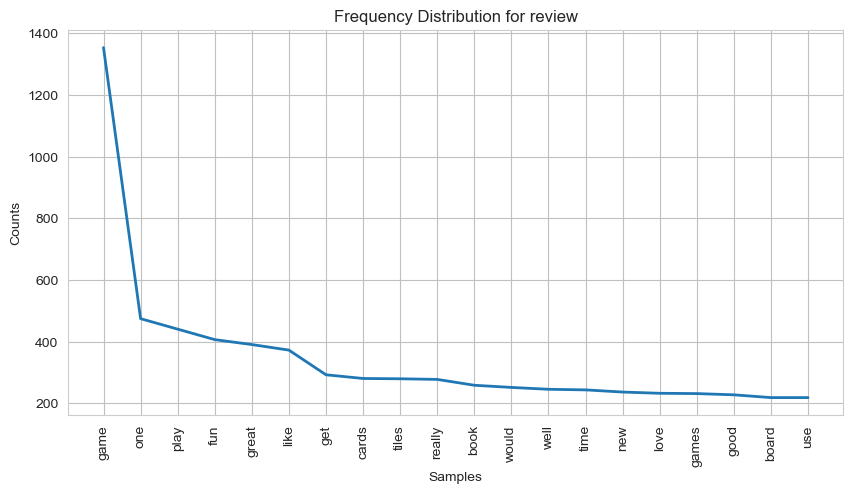

Most common words for review:
game: 1354
one: 475
play: 441
fun: 407
great: 391
like: 373
get: 293
cards: 281
tiles: 280
really: 278
book: 259
would: 252
well: 246
time: 244
new: 237
love: 233
games: 232
good: 228
board: 219
use: 219




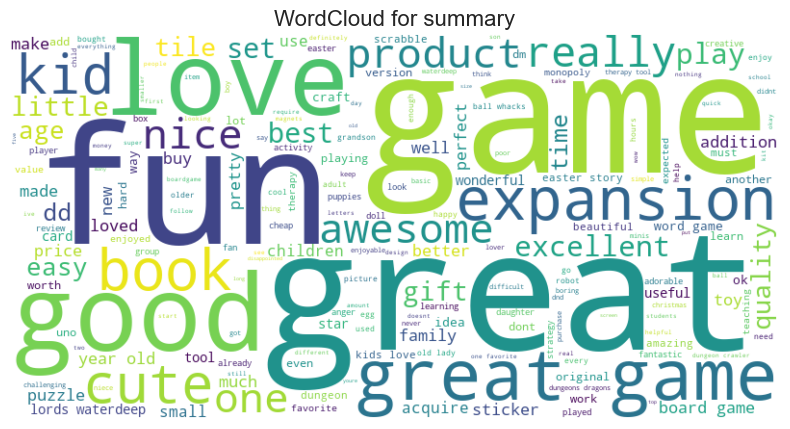

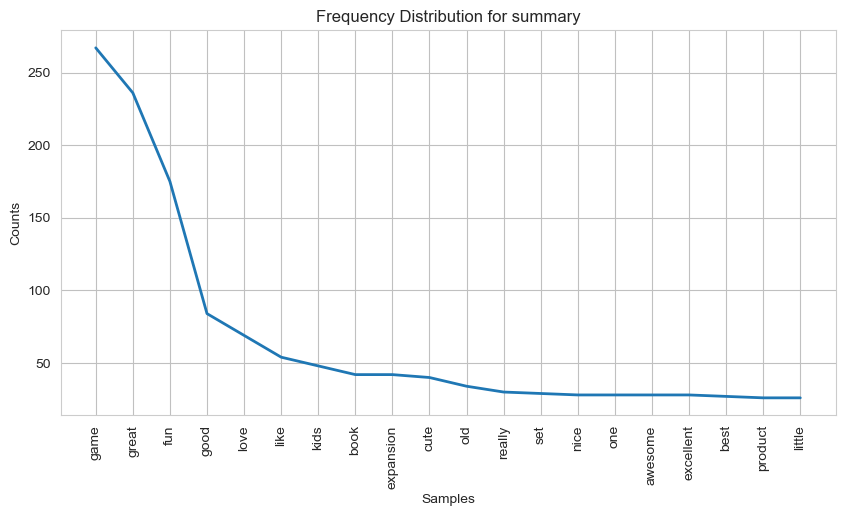

Most common words for summary:
game: 267
great: 236
fun: 175
good: 84
love: 69
like: 54
kids: 48
book: 42
expansion: 42
cute: 40
old: 34
really: 30
set: 29
nice: 28
one: 28
awesome: 28
excellent: 28
best: 27
product: 26
little: 26




In [269]:
# Define your text columns and colors
text_columns = ['review', 'summary']
column_colors = ['plasma', 'viridis']

# Apply tokenization, generate word clouds, and frequency distributions
freq_dists = tokenize_and_wordcloud(clean_df, text_columns, column_colors)

## Review polarity and sentiment scores

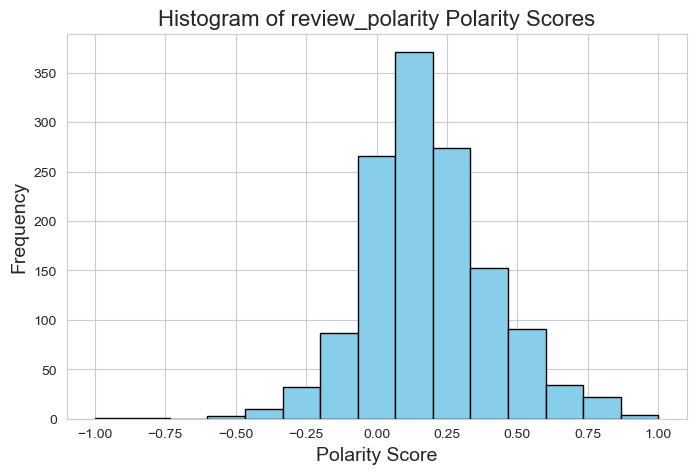

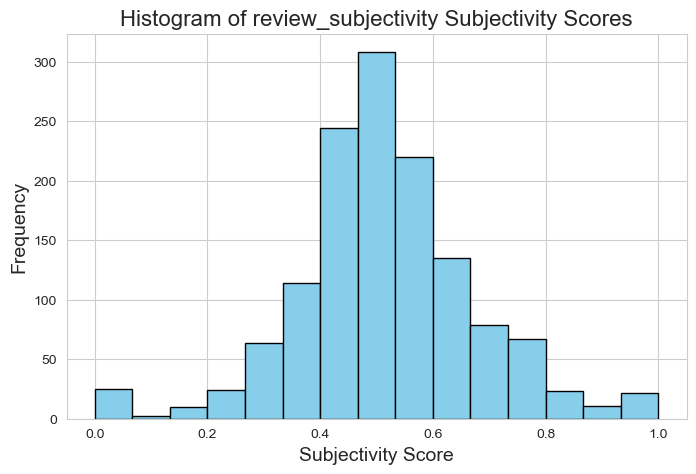

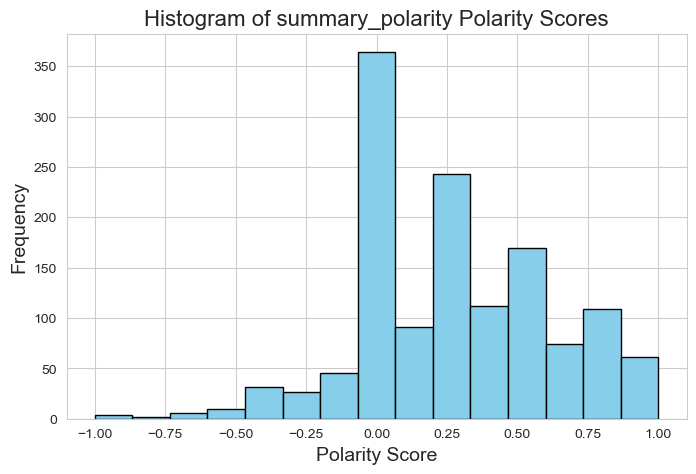

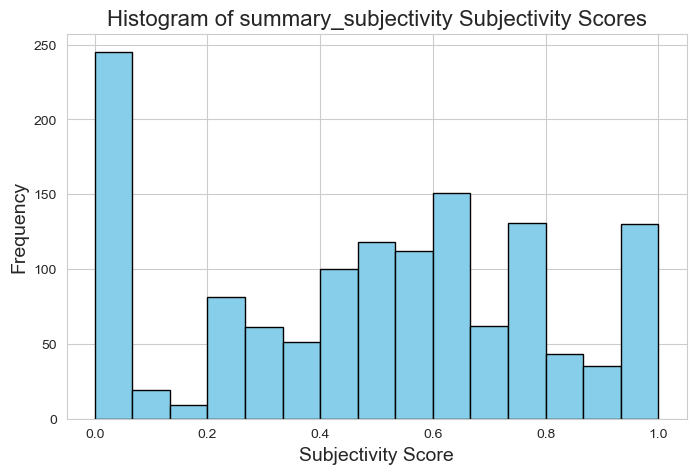

                                                 review  review_polarity  \
0     when it comes to a dms screen the space on the...        -0.036111   
1     an open letter to galeforce your unpainted min...         0.035952   
2     nice art nice printing why two panels are fill...         0.116640   
3     amazing buy bought it as a gift for our new dm...         0.578788   
4     as my review of gfs previous screens these wer...        -0.316667   
...                                                 ...              ...   
1343  this is a fun card game for people who like wo...         0.250000   
1344  fun for the family just make certain you agree...         0.171429   
1345  great game to keep the mind active we play it ...         0.155208   
1346  we are retired and find this a great way to st...         0.400000   
1347  the perfect word game for mixed ages with mom ...         0.168750   

      review_subjectivity                                            summary  \
0      

In [272]:
# Extract both polarity and subjectivity.
def generate_sentiment(comment):
    '''Extract both polarity (-1 to +1) and subjectivity (0 to 1) for each comment'''
    sentiment = TextBlob(comment).sentiment
    return sentiment.polarity, sentiment.subjectivity

# Plot the sentiment histogram (polarity and subjectivity) and save the image
def plot_sentiment_histogram(df, column, bins=15, sentiment_type='Polarity', filename=None):
    '''Generate histogram plot of sentiment polarity or subjectivity scores and save the plot to a file'''
    plt.figure(figsize=(8, 5))
    plt.hist(df[column], bins=bins, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column} {sentiment_type} Scores', fontsize=16)
    plt.xlabel(f'{sentiment_type} Score', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True)
    
    # Save the plot if a filename is provided
    if filename is None:
        filename = f'{column}_{sentiment_type}_histogram.png'
    plt.savefig(filename)
    
    plt.show()

# Apply extraction and plot histograms.
def apply_sentiment_and_plot(df, text_columns):
    '''Apply sentiment function to text columns and plot histograms for both polarity and subjectivity'''
    for col in text_columns:
        # Apply sentiment function to each column and create new columns for polarity and subjectivity
        df[[f'{col}_polarity', f'{col}_subjectivity']] = df[col].apply(
            lambda x: pd.Series(generate_sentiment(x))
        )
        
        # Plot histogram of polarity scores for this column and save it
        plot_sentiment_histogram(df, f'{col}_polarity', sentiment_type='Polarity', filename=f'{col}_polarity_histogram.png')
        
        # Plot histogram of subjectivity scores for this column and save it
        plot_sentiment_histogram(df, f'{col}_subjectivity', sentiment_type='Subjectivity', filename=f'{col}_subjectivity_histogram.png')

# Define your text columns to apply the sentiment function
text_columns = ['review', 'summary']

# Apply the sentiment score generation and histogram plotting
apply_sentiment_and_plot(clean_df, text_columns)

# Display the DataFrame with the new sentiment columns
print(clean_df[['review', 'review_polarity', 'review_subjectivity', 'summary', 'summary_polarity', 'summary_subjectivity']])


### Notes: 

**Review** Polarity and Subjectivity:

- The review polarity histogram shows a near-normal distribution, centered around a polarity score of 0. This indicates that most customer reviews have a neutral sentiment, with fewer strongly positive or negative sentiments.
- The review subjectivity histogram suggests that the reviews tend to be somewhat subjective, as most scores are between 0.4 and 0.6. Few reviews are either fully objective or extremely subjective.


**Summary** Polarity and Subjectivity:

- The summary polarity histogram shows a wider spread of polarity scores, with a large peak near zero, but also a considerable number of positive polarity values, indicating more varied sentiment in the summaries compared to reviews.
- The summary subjectivity histogram shows a bimodal distribution, suggesting that while many summaries are either highly subjective or highly objective, fewer are in the middle, unlike the reviews which tended to be moderately subjective.

## Top 20 positive and negative reviews

In [164]:
def print_top_reviews(df, text_column, polarity_column, top_n=20):
    """
    Print the top N most positive and negative reviews based on polarity scores.
    """
    # Sort the DataFrame by polarity score in ascending order
    df_sorted = df[[text_column, polarity_column]].sort_values(by=polarity_column)

    # Print the top N most negative reviews
    print(f'Top {top_n} Most Negative {text_column.capitalize()} Reviews:\n')
    for i, row in df_sorted.head(top_n).iterrows():
        print(f'Polarity: {row[polarity_column]:.2f}, Review: {row[text_column]}')
        print('-' * 100)

    print('\n' + '=' * 100 + '\n')

    # Print the top N most positive reviews
    print(f'Top {top_n} Most Positive {text_column.capitalize()} Reviews:\n')
    for i, row in df_sorted.tail(top_n).iterrows():
        print(f'Polarity: {row[polarity_column]:.2f}, Review: {row[text_column]}')
        print('-' * 100)

# Apply the function to both review and summary columns
print_top_reviews(clean_df, 'review', 'review_polarity', top_n=20)
print_top_reviews(clean_df, 'summary', 'summary_polarity', top_n=20)


Top 20 Most Negative Review Reviews:

Polarity: -1.00, Review: booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not
----------------------------------------------------------------------------------------------------
Polarity: -0.78, Review: incomplete kit very disappointing
----------------------------------------------------------------------------------------------------
Polarity: -0.55, Review: one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it
----------------------------------------------------------------------------------------------------
Polarity: -0.50, Review: i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift
----------------------------------------------

**[Table of Contents](#Table_of_contents)**

# 